<a href="https://colab.research.google.com/github/roshni2001/Tools-Project/blob/main/FinalToolsProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

#Load the Dataset

In [2]:
data=pd.read_csv("loan_approval_dataset.csv")

#Preprocessing and Data Inspection

**CHECK FOR MISSING VALUES**

In [3]:
# Check for null values
print(data.isnull().sum())

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


**DATASET SIZE**

In [4]:
data.shape

(4269, 13)

**Analyzing both numeric and object series and also the DataFrame column sets of mixed data type**

In [5]:
# Display dataset statistics
print(data.describe())

           loan_id   no_of_dependents   income_annum   loan_amount  \
count  4269.000000        4269.000000   4.269000e+03  4.269000e+03   
mean   2135.000000           2.498712   5.059124e+06  1.513345e+07   
std    1232.498479           1.695910   2.806840e+06  9.043363e+06   
min       1.000000           0.000000   2.000000e+05  3.000000e+05   
25%    1068.000000           1.000000   2.700000e+06  7.700000e+06   
50%    2135.000000           3.000000   5.100000e+06  1.450000e+07   
75%    3202.000000           4.000000   7.500000e+06  2.150000e+07   
max    4269.000000           5.000000   9.900000e+06  3.950000e+07   

         loan_term   cibil_score   residential_assets_value  \
count  4269.000000   4269.000000               4.269000e+03   
mean     10.900445    599.936051               7.472617e+06   
std       5.709187    172.430401               6.503637e+06   
min       2.000000    300.000000              -1.000000e+05   
25%       6.000000    453.000000               2.20000

**Remove leading spaces from column names**

In [6]:
data.columns = data.columns.str.lstrip()

**FEATURE ENGINEERING**

In [7]:
# creating income-to-loan ratio
data['income_to_loan_ratio']= data['income_annum']/ data['loan_amount']
# creating total asset value i.e which is the sum of
# residential assets, commercial assets, luxury assets and bank assets
data['total_asset_value'] = data['residential_assets_value']+ data['commercial_assets_value'] + data['luxury_assets_value'] + data['bank_asset_value']


In [8]:
data.shape

(4269, 15)

In [9]:
data= data.drop(['residential_assets_value','commercial_assets_value',
             'luxury_assets_value','bank_asset_value'], axis=1)
data.shape

(4269, 11)

In [10]:
data.head(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,income_to_loan_ratio,total_asset_value
0,1,2,Graduate,No,9600000,29900000,12,778,Approved,0.321070,50700000
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,0.336066,17000000
2,3,3,Graduate,No,9100000,29700000,20,506,Rejected,0.306397,57700000
3,4,3,Graduate,No,8200000,30700000,8,467,Rejected,0.267101,52700000
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,0.404959,55000000


**Display unique values in categorical columns**

In [11]:
categorical_cols = ['education', 'self_employed', 'loan_status']
for col in categorical_cols:
    print(f"Unique values in {col}: {data[col].unique()}")

Unique values in education: [' Graduate' ' Not Graduate']
Unique values in self_employed: [' No' ' Yes']
Unique values in loan_status: [' Approved' ' Rejected']


**LABEL ENCONDING**

In [12]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
data['education'] = label_encoder.fit_transform(data['education'])  # Graduate=0, Not Graduate=1
data['self_employed'] = label_encoder.fit_transform(data['self_employed'])  # No=0, Yes=1
data['loan_status'] = label_encoder.fit_transform(data['loan_status'])  # Approved=1, Rejected=0

data.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,income_to_loan_ratio,total_asset_value
0,1,2,0,0,9600000,29900000,12,778,0,0.321070,50700000
1,2,0,1,1,4100000,12200000,8,417,1,0.336066,17000000
2,3,3,0,0,9100000,29700000,20,506,1,0.306397,57700000
3,4,3,0,0,8200000,30700000,8,467,1,0.267101,52700000
4,5,5,1,1,9800000,24200000,20,382,1,0.404959,55000000


# Loan status distribution

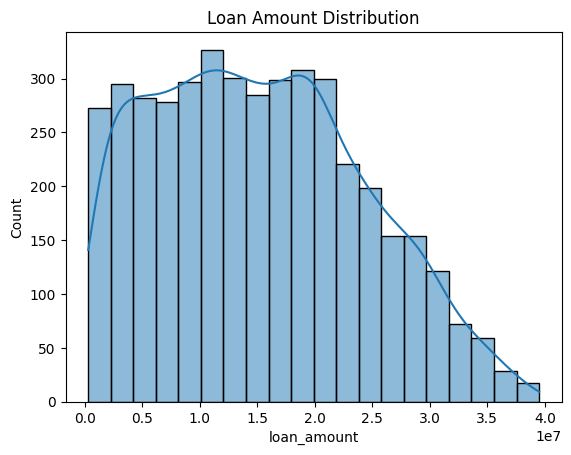

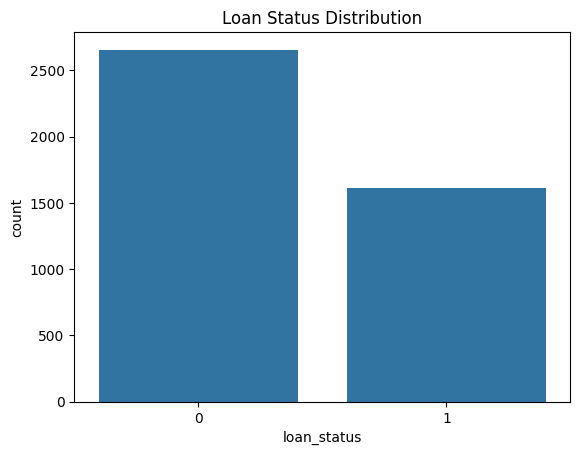

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
# Distribution of Loan Amount
sns.histplot(data['loan_amount'], kde=True, bins=20)
plt.title("Loan Amount Distribution")
plt.show()

# Categorical distribution for loan status
sns.countplot(x='loan_status', data=data)
plt.title("Loan Status Distribution")
plt.show()


**Outlier Detection**

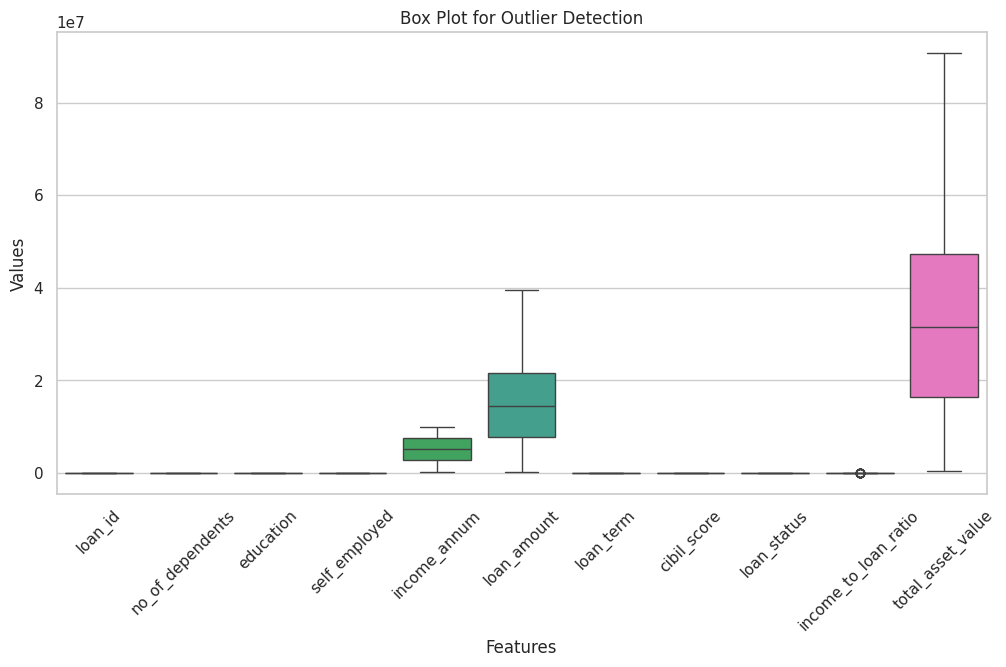

In [14]:
import matplotlib.pyplot as plt

# Create a boxplot
sns.set(style="whitegrid")
# Create a box plot for each numerical column in the dataset
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.title('Box Plot for Outlier Detection')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()


# Removing outliers using Z-score method

In [15]:
from scipy import stats
# Define a function to remove outliers based on Z-score
def remove_outliers_z_score(df, threshold=3):
    # Create a copy of the DataFrame to avoid modifying the original
    df_cleaned = df.copy()

    # Calculate Z-scores for each numerical column
    z_scores = stats.zscore(df_cleaned.select_dtypes(include=['float64', 'int64']))

    # Create a boolean mask to identify outliers
    mask = (abs(z_scores) < threshold).all(axis=1)

    # Filter the DataFrame to exclude outliers
    df_cleaned = df_cleaned[mask]

    return df_cleaned

# Remove outliers from the dataset using Z-score
cleaned_dataset = remove_outliers_z_score(data)
print(f"Data shape after outlier removal: {cleaned_dataset.shape}")

# Display the cleaned dataset
cleaned_dataset.head()

Data shape after outlier removal: (4254, 11)


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,income_to_loan_ratio,total_asset_value
0,1,2,0,0,9600000,29900000,12,778,0,0.321070,50700000
1,2,0,1,1,4100000,12200000,8,417,1,0.336066,17000000
2,3,3,0,0,9100000,29700000,20,506,1,0.306397,57700000
3,4,3,0,0,8200000,30700000,8,467,1,0.267101,52700000
4,5,5,1,1,9800000,24200000,20,382,1,0.404959,55000000


# Visualizing data after removing Outliers

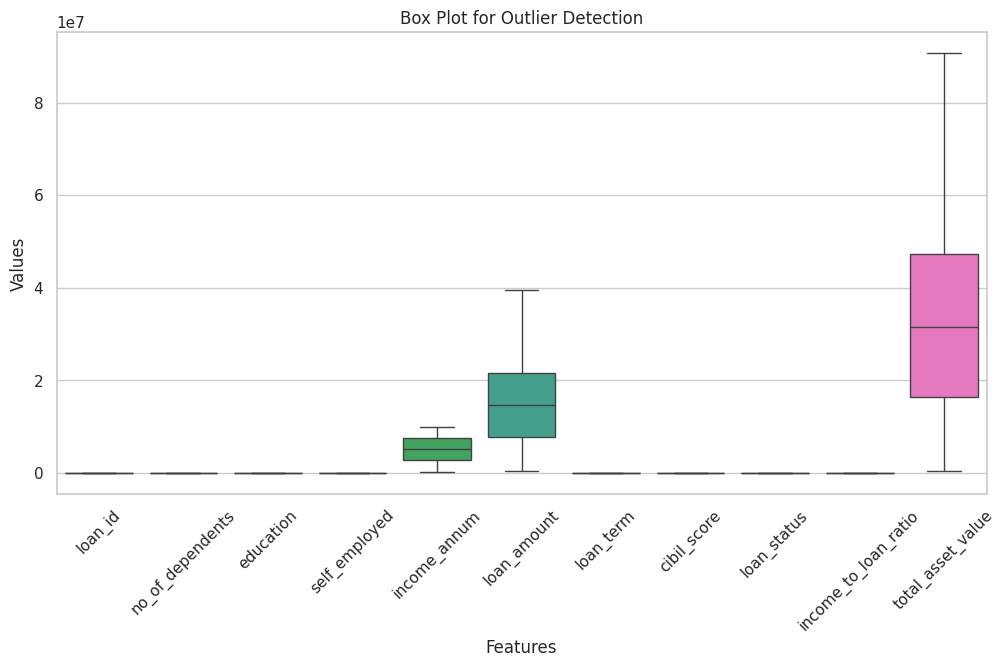

In [16]:
sns.set(style="whitegrid")

# Create a box plot for each numerical column in the dataset
plt.figure(figsize=(12, 6))
sns.boxplot(data= cleaned_dataset)
plt.title('Box Plot for Outlier Detection')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()


**FEATURE SCALING**

In [17]:
 from sklearn.preprocessing import LabelEncoder, StandardScaler
# #Normalize numerical features
# # Initialize scaler
data_cleaned = cleaned_dataset
 scaler = StandardScaler()

# # Identify numerical columns
 numerical_cols = ['income_annum','cibil_score', 'loan_amount','total_asset_value','income_to_loan_ratio']


# # Apply scaling
 data_cleaned[numerical_cols] = scaler.fit_transform(data_cleaned[numerical_cols])
 data_cleaned.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,income_to_loan_ratio,total_asset_value
0,1,2,0,0,1.617476,1.632090,12,1.031913,0,-0.379373,0.927534
1,2,0,1,1,-0.348972,-0.331120,8,-1.062293,1,-0.172407,-0.804961
2,3,3,0,0,1.438708,1.609906,20,-0.545993,1,-0.581890,1.287399
3,4,3,0,0,1.116926,1.720822,8,-0.772237,1,-1.124260,1.030352
4,5,5,1,1,1.688983,0.999869,20,-1.265332,1,0.778460,1.148594


# Recursive Feature Elimination To select important features

In [18]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Define features and target
X = data_cleaned.drop(['loan_id', 'loan_status'], axis=1)
y = data_cleaned['loan_status']

# Recursive Feature Elimination
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=5)
X_selected = rfe.fit_transform(X, y)

# Display selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['loan_amount', 'loan_term', 'cibil_score', 'income_to_loan_ratio',
       'total_asset_value'],
      dtype='object')


# Exploratory Data Analysis (EDA)

Dataset Shape: (4269, 11)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_id               4269 non-null   int64  
 1   no_of_dependents      4269 non-null   int64  
 2   education             4269 non-null   int64  
 3   self_employed         4269 non-null   int64  
 4   income_annum          4269 non-null   int64  
 5   loan_amount           4269 non-null   int64  
 6   loan_term             4269 non-null   int64  
 7   cibil_score           4269 non-null   int64  
 8   loan_status           4269 non-null   int64  
 9   income_to_loan_ratio  4269 non-null   float64
 10  total_asset_value     4269 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 367.0 KB
None

Missing Values:
 loan_id                 0
no_of_dependents        0
education               0
self_employed           0
income_an

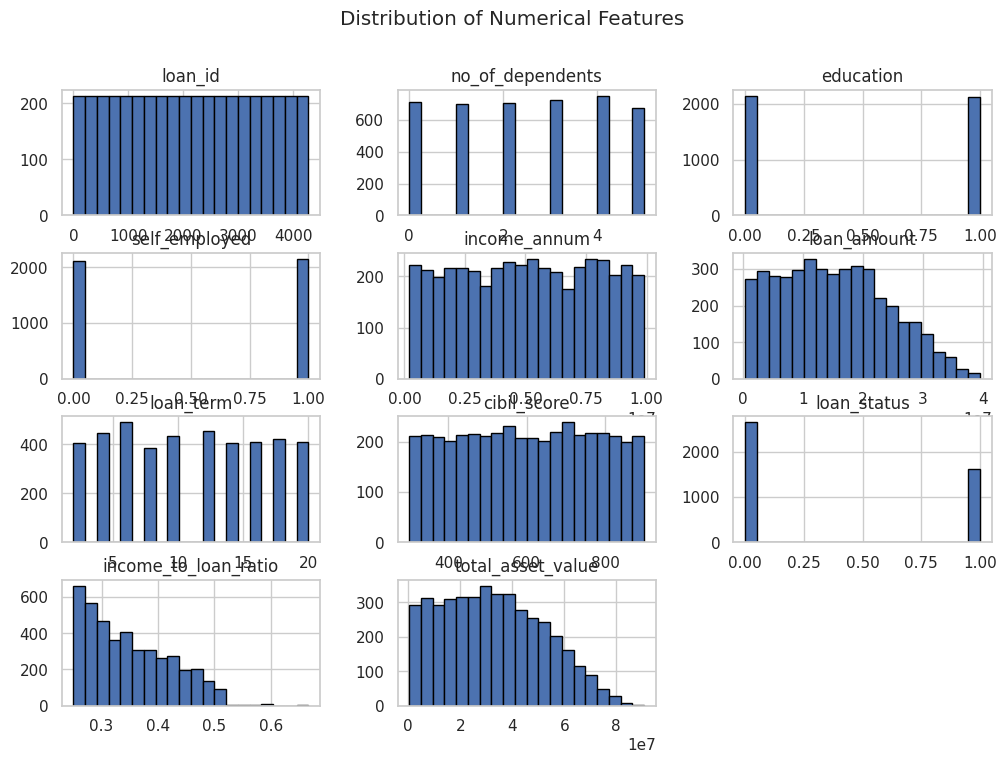

loan_id: Skewness = 0.00, Kurtosis = -1.20
no_of_dependents: Skewness = -0.02, Kurtosis = -1.26
education: Skewness = 0.01, Kurtosis = -2.00
self_employed: Skewness = -0.01, Kurtosis = -2.00
income_annum: Skewness = -0.01, Kurtosis = -1.18
loan_amount: Skewness = 0.31, Kurtosis = -0.74
loan_term: Skewness = 0.04, Kurtosis = -1.22
cibil_score: Skewness = -0.01, Kurtosis = -1.19
loan_status: Skewness = 0.50, Kurtosis = -1.75
income_to_loan_ratio: Skewness = 0.63, Kurtosis = -0.33
total_asset_value: Skewness = 0.30, Kurtosis = -0.76

Categorical Features: Index([], dtype='object')


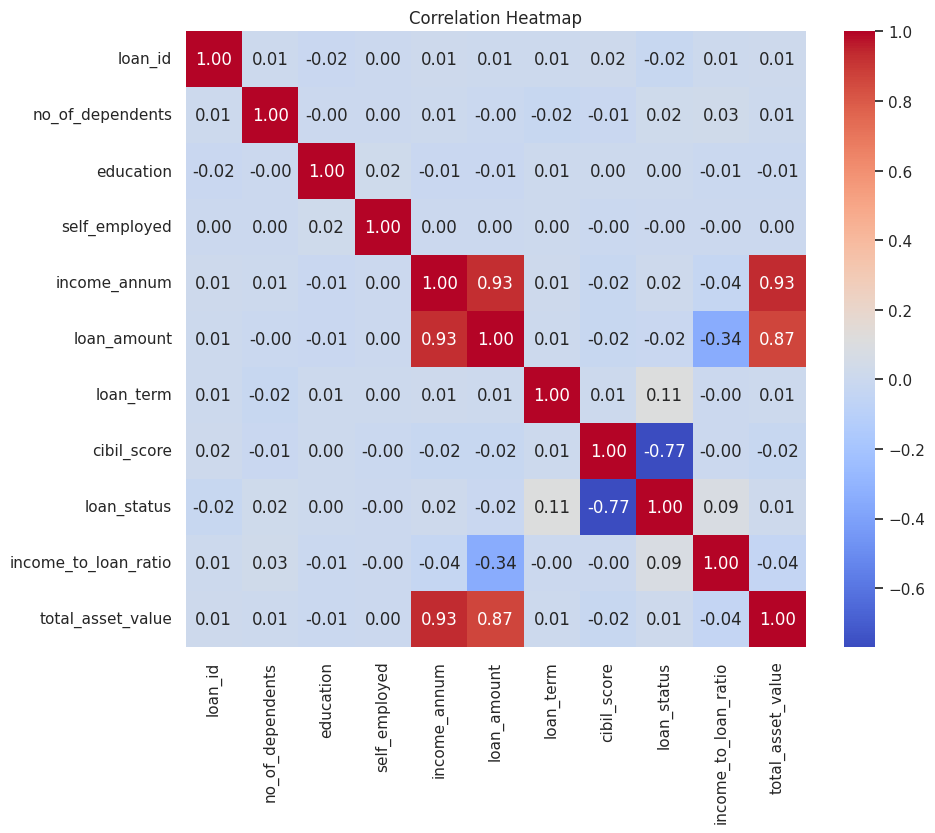


Highly Correlated Feature Pairs:
 total_asset_value  income_annum         0.931845
income_annum       total_asset_value    0.931845
                   loan_amount          0.927470
loan_amount        income_annum         0.927470
total_asset_value  loan_amount          0.867067
loan_amount        total_asset_value    0.867067
dtype: float64


In [19]:
# Exploratory Data Analysis (EDA)

# 1. Dataset Overview
print("Dataset Shape:", data.shape)
print("\nDataset Info:")
print(data.info())
print("\nMissing Values:\n", data.isnull().sum())
print("\nDuplicate Records:", data.duplicated().sum())

# 2. Handle Missing Values (Optional: Add Based on Your Needs)
for col in data.columns:
    if data[col].isnull().sum() > 0:
        if data[col].dtype == 'object':
            data[col].fillna(data[col].mode()[0], inplace=True)
        else:
            data[col].fillna(data[col].mean(), inplace=True)

print("\nMissing Values After Handling:\n", data.isnull().sum())

# 3. Univariate Analysis - Numerical Features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical Features:", numerical_features)

# Histograms for numerical features
data[numerical_features].hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Distribution of Numerical Features")
plt.show()

# Skewness and Kurtosis Analysis
from scipy.stats import skew, kurtosis
for col in numerical_features:
    print(f"{col}: Skewness = {skew(data[col]):.2f}, Kurtosis = {kurtosis(data[col]):.2f}")

# 4. Univariate Analysis - Categorical Features
categorical_features = data.select_dtypes(include=['object']).columns
print("\nCategorical Features:", categorical_features)

# Bar plots for categorical features
for col in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=data, order=data[col].value_counts().index)
    plt.title(f"Frequency of {col}")
    plt.xticks(rotation=45)
    plt.show()

# 5. Target Variable Analysis (replace 'Loan_Status' with your actual target column name)
target = 'Loan_Status'  # Replace with your actual target column name
if target in data.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=target, data=data)
    plt.title(f"Distribution of {target}")
    plt.show()

# 6. Correlation Analysis - Numerical Features
plt.figure(figsize=(10, 8))
corr_matrix = data[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Detect High Correlation Pairs
high_corr_pairs = corr_matrix.unstack().sort_values(ascending=False)
high_corr_pairs = high_corr_pairs[high_corr_pairs != 1.0]
print("\nHighly Correlated Feature Pairs:\n", high_corr_pairs[high_corr_pairs > 0.8])

# 7. Feature Importance (Optional: Using RandomForest - Works if target is numerical or encoded)
if target in data.columns:
    if not pd.api.types.is_numeric_dtype(data[target]):
        data[target] = data[target].astype('category').cat.codes  # Encode target if not numerical

    features = data.drop(columns=[target]).select_dtypes(include=['int64', 'float64'])
    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier(random_state=42)
    rf.fit(features, data[target])
    feature_importance = pd.Series(rf.feature_importances_, index=features.columns).sort_values(ascending=False)

    # Plot Feature Importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance, y=feature_importance.index)
    plt.title("Feature Importance (RandomForest)")
    plt.xlabel("Importance Score")
    plt.ylabel("Features")
    plt.show()


# Train Models (Random Forest and XGBoost)

In [20]:
# pip install scikit-learn==1.0.2

In [21]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Random Forest Model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# XGBoost Model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# Ensemble Learning,  Combine predictions from both models

In [22]:
import numpy as np

# Predictions
rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

# Ensemble Predictions (Majority Voting)
final_preds = np.where((rf_preds + xgb_preds) >= 1, 1, 0)


**Evaluation Metrics**

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, final_preds))
print("Precision:", precision_score(y_test, final_preds))
print("Recall:", recall_score(y_test, final_preds))
print("F1 Score:", f1_score(y_test, final_preds))


Accuracy: 0.9929494712103408
Precision: 0.987987987987988
Recall: 0.9939577039274925
F1 Score: 0.9909638554216867


Confusion Matrix for Ensemble Predictions:


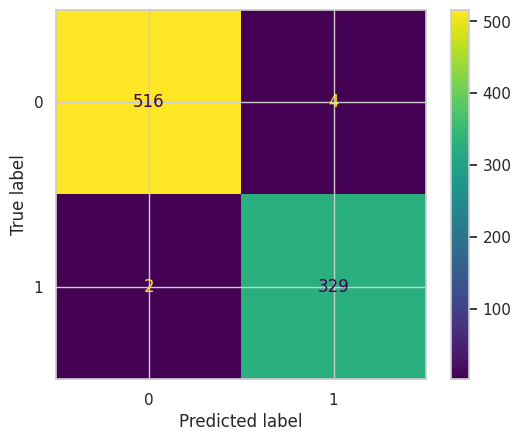

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Generate Confusion Matrix for Ensemble Predictions
ensemble_cm = confusion_matrix(y_test, final_preds)

# Display Confusion Matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=ensemble_cm)
cm_display.plot()

# Print Confusion Matrix
print("Confusion Matrix for Ensemble Predictions:")

AUC for Ensemble Prediction: 0.9996


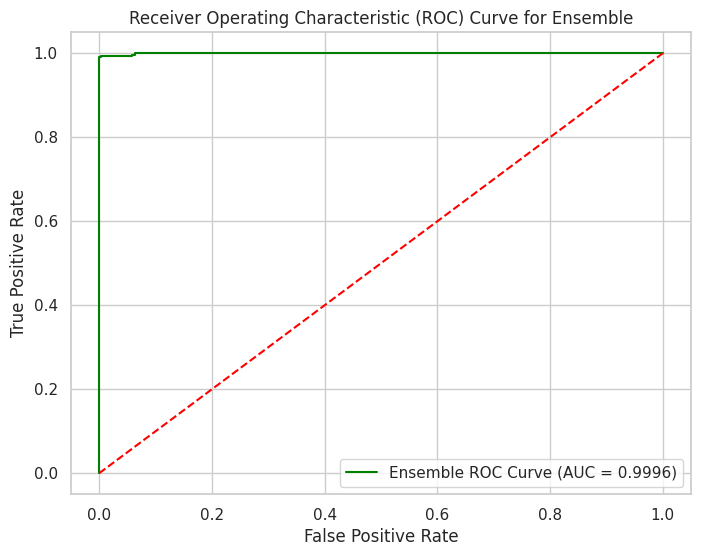

In [25]:
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities using Random Forest and XGBoost
rf_probs = rf_model.predict_proba(X_test)[:, 1]
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

# Step 1: Average the probabilities for Ensemble
ensemble_probs = (rf_probs + xgb_probs) / 2

# Step 2: Calculate AUC for Ensemble
ensemble_auc = roc_auc_score(y_test, ensemble_probs)
print("AUC for Ensemble Prediction: {:.4f}".format(ensemble_auc))

# Step 3: Compute ROC Curve for Ensemble
fpr, tpr, _ = roc_curve(y_test, ensemble_probs)

# Step 4: Plot ROC Curve for Ensemble
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', label=f'Ensemble ROC Curve (AUC = {ensemble_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Ensemble')
plt.legend(loc='lower right')
plt.show()


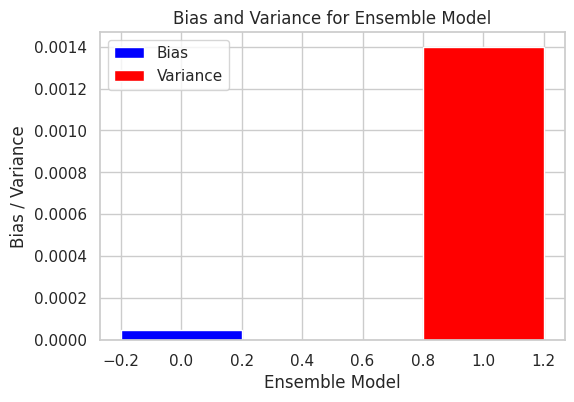

Ensemble Model - Bias: 0.0000, Variance: 0.0014


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Function to calculate Bias and Variance for Ensemble
def calculate_bias_variance_ensemble(rf_model, xgb_model, X_train, y_train, X_test, y_test, n_iterations=100):
    # Initialize arrays to store predictions
    predictions = np.zeros((n_iterations, X_test.shape[0]))

    # Bootstrapping (train multiple models on different subsets of training data)
    for i in range(n_iterations):
        # Resample the training data with replacement
        X_resample, y_resample = resample(X_train, y_train, random_state=i)
        rf_model.fit(X_resample, y_resample)
        xgb_model.fit(X_resample, y_resample)

        # Combine predictions using majority voting
        rf_preds = rf_model.predict(X_test)
        xgb_preds = xgb_model.predict(X_test)
        ensemble_preds = np.where((rf_preds + xgb_preds) >= 1, 1, 0)

        predictions[i, :] = ensemble_preds

    # Compute the mean predictions across all models
    mean_predictions = np.mean(predictions, axis=0)

    # Calculate bias
    bias = np.mean(mean_predictions - y_test)

    # Calculate variance
    variance = np.mean((predictions - mean_predictions) ** 2)

    return bias, variance

# Random Forest and XGBoost Models
rf_model = RandomForestClassifier()
xgb_model = XGBClassifier()

# Calculate bias and variance for Ensemble Model
ensemble_bias, ensemble_variance = calculate_bias_variance_ensemble(rf_model, xgb_model, X_train, y_train, X_test, y_test)

# Plot Bias and Variance for Ensemble Model
fig, ax = plt.subplots(figsize=(6, 4))

# Plot Bias
ax.bar(0, ensemble_bias, 0.4, label='Bias', color='blue')

# Plot Variance
ax.bar(1, ensemble_variance, 0.4, label='Variance', color='red')

# Labels and Title
ax.set_xlabel('Ensemble Model')
ax.set_ylabel('Bias / Variance')
ax.set_title('Bias and Variance for Ensemble Model')
ax.legend()

# Display the plot
plt.show()

print("Ensemble Model - Bias: {:.4f}, Variance: {:.4f}".format(ensemble_bias, ensemble_variance))


# Train and Evaluate Random Forest (RF)

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predict using Random Forest
rf_preds = rf_model.predict(X_test)

# Evaluate Random Forest model
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_precision = precision_score(y_test, rf_preds)
rf_recall = recall_score(y_test, rf_preds)
rf_f1_score = f1_score(y_test, rf_preds)

# Display Random Forest evaluation metrics
print("Random Forest Evaluation Metrics:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1 Score: {rf_f1_score:.4f}")


Random Forest Evaluation Metrics:
Accuracy: 0.9953
Precision: 0.9940
Recall: 0.9940
F1 Score: 0.9940


Confusion Matrix for Random Forest:
[[518   2]
 [  2 329]]


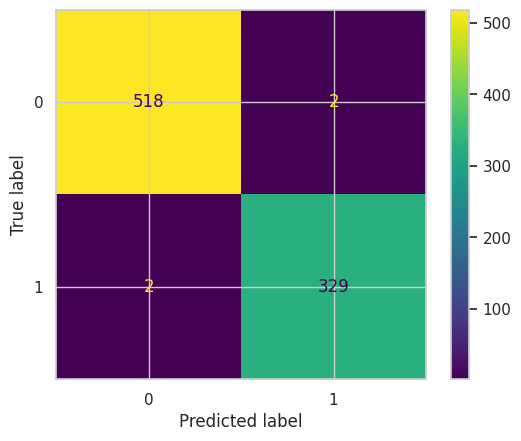

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate Confusion Matrix Random Forest
rf_cm = confusion_matrix(y_test, rf_preds)

# Display Confusion Matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=rf_cm)
cm_display.plot()

# Optionally, print the numerical confusion matrix
print("Confusion Matrix for Random Forest:")
print(rf_cm)

AUC for Random Forest: 0.9379


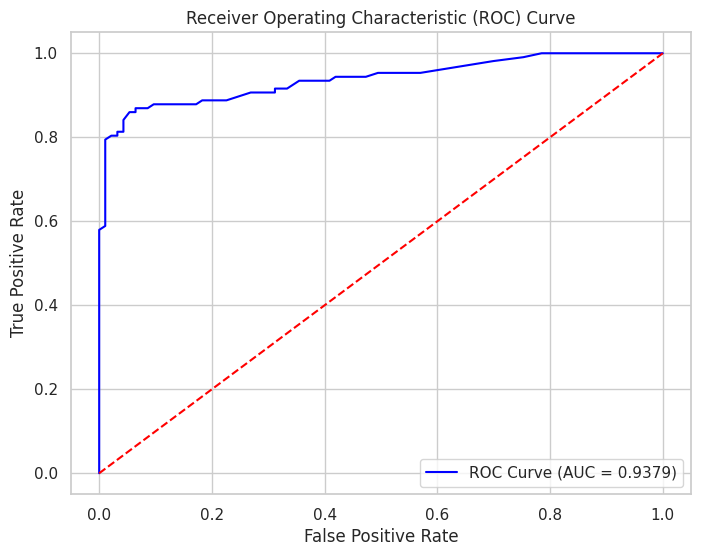

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Step 1: Load and Split Data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 3: Predict Probabilities
rf_probs = rf_model.predict_proba(X_test)[:, 1]  # Probability for the positive class

# Step 4: Calculate AUC
rf_auc = roc_auc_score(y_test, rf_probs)
print("AUC for Random Forest: {:.4f}".format(rf_auc))

# Step 5: Compute ROC Curve
fpr, tpr, _ = roc_curve(y_test, rf_probs)

# Step 6: Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {rf_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

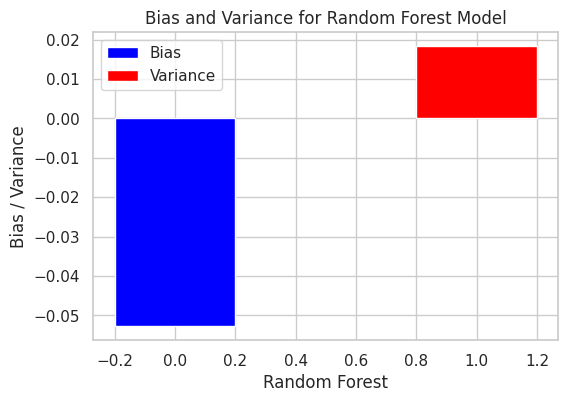

Random Forest - Bias: -0.0528, Variance: 0.0183


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample  # Importing resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


def calculate_bias_variance_rf(model, X_train, y_train, X_test, y_test, n_iterations=100):
    # Initialize arrays to store predictions
    predictions = np.zeros((n_iterations, X_test.shape[0]))

    # Bootstrapping (train multiple models on different subsets of training data)
    for i in range(n_iterations):
        # Resample the training data with replacement
        X_resample, y_resample = resample(X_train, y_train, random_state=i)
        model.fit(X_resample, y_resample)
        predictions[i, :] = model.predict(X_test)

    # Compute the mean predictions across all models
    mean_predictions = np.mean(predictions, axis=0)

    # Calculate bias
    bias = np.mean(mean_predictions - y_test)

    # Calculate variance
    variance = np.mean((predictions - mean_predictions) ** 2)

    return bias, variance

# Random Forest Model
rf_model = RandomForestClassifier()

# Calculate bias and variance for Random Forest
rf_bias, rf_variance = calculate_bias_variance_rf(rf_model, X_train, y_train, X_test, y_test)

# Plot Bias and Variance for Random Forest
fig, ax = plt.subplots(figsize=(6, 4))

# Plot Bias
ax.bar(0, rf_bias, 0.4, label='Bias', color='blue')

# Plot Variance
ax.bar(1, rf_variance, 0.4, label='Variance', color='red')

# Labels and Title
ax.set_xlabel('Random Forest')
ax.set_ylabel('Bias / Variance')
ax.set_title('Bias and Variance for Random Forest Model')
ax.legend()

# Display the plot
plt.show()

print("Random Forest - Bias: {:.4f}, Variance: {:.4f}".format(rf_bias, rf_variance))

# Train and Evaluate XGBoost (XGB)

In [31]:
# Train XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Predict using XGBoost
xgb_preds = xgb_model.predict(X_test)

# Evaluate XGBoost model
xgb_accuracy = accuracy_score(y_test, xgb_preds)
xgb_precision = precision_score(y_test, xgb_preds)
xgb_recall = recall_score(y_test, xgb_preds)
xgb_f1_score = f1_score(y_test, xgb_preds)

# Display XGBoost evaluation metrics
print("\nXGBoost Evaluation Metrics:")
print(f"Accuracy: {xgb_accuracy:.4f}")
print(f"Precision: {xgb_precision:.4f}")
print(f"Recall: {xgb_recall:.4f}")
print(f"F1 Score: {xgb_f1_score:.4f}")



XGBoost Evaluation Metrics:
Accuracy: 0.8950
Precision: 0.9479
Recall: 0.8505
F1 Score: 0.8966


Confusion Matrix for XGBoost:
[[88  5]
 [16 91]]


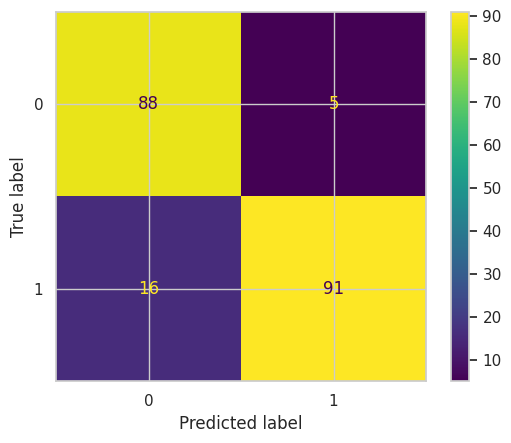

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate Confusion Matrix for XGBoost
xgb_cm = confusion_matrix(y_test, xgb_preds)

# Display Confusion Matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=xgb_cm)
cm_display.plot()

# Optionally, print the numerical confusion matrix
print("Confusion Matrix for XGBoost:")
print(xgb_cm)

AUC for XGBoost: 0.9435


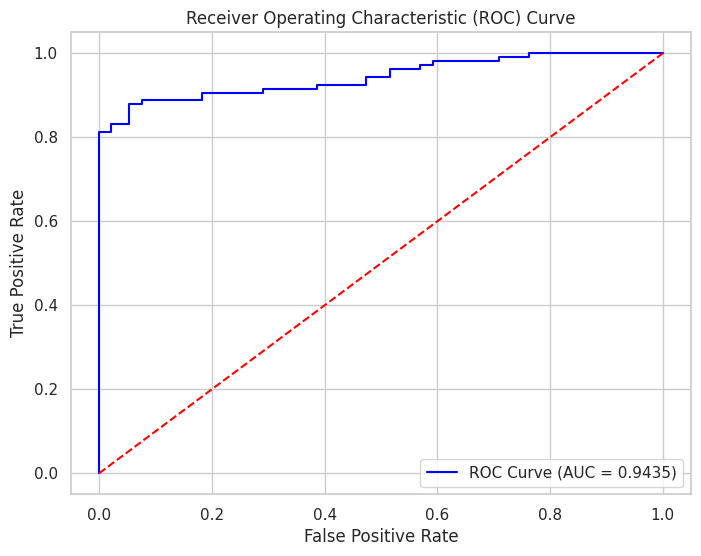

In [33]:
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Step 1: Load and Split Data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train XGBoost Model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Step 3: Predict Probabilities
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]  # Probability for the positive class

# Step 4: Calculate AUC
xgb_auc = roc_auc_score(y_test, xgb_probs)
print("AUC for XGBoost: {:.4f}".format(xgb_auc))

# Step 5: Compute ROC Curve
fpr, tpr, _ = roc_curve(y_test, xgb_probs)

# Step 6: Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {xgb_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

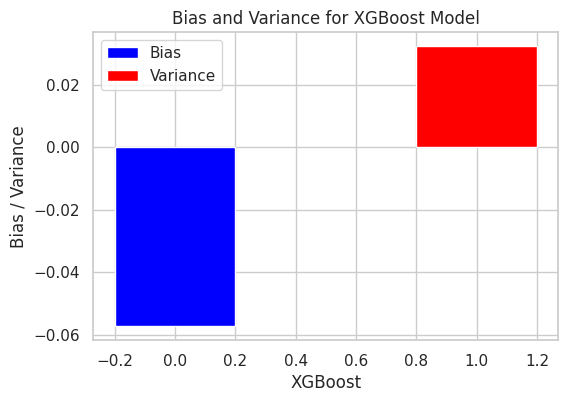

XGBoost - Bias: -0.0573, Variance: 0.0324


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def calculate_bias_variance_xgb(model, X_train, y_train, X_test, y_test, n_iterations=100):
    # Initialize arrays to store predictions
    predictions = np.zeros((n_iterations, X_test.shape[0]))

    # Bootstrapping (train multiple models on different subsets of training data)
    for i in range(n_iterations):
        # Resample the training data with replacement
        X_resample, y_resample = resample(X_train, y_train, random_state=i)
        model.fit(X_resample, y_resample)
        predictions[i, :] = model.predict(X_test)

    # Compute the mean predictions across all models
    mean_predictions = np.mean(predictions, axis=0)

    # Calculate bias
    bias = np.mean(mean_predictions - y_test)

    # Calculate variance
    variance = np.mean((predictions - mean_predictions) ** 2)

    return bias, variance

# XGBoost Model
xgb_model = XGBClassifier()

# Calculate bias and variance for XGBoost
xgb_bias, xgb_variance = calculate_bias_variance_xgb(xgb_model, X_train, y_train, X_test, y_test)

# Plot Bias and Variance for XGBoost
fig, ax = plt.subplots(figsize=(6, 4))

# Plot Bias
ax.bar(0, xgb_bias, 0.4, label='Bias', color='blue')

# Plot Variance
ax.bar(1, xgb_variance, 0.4, label='Variance', color='red')

# Labels and Title
ax.set_xlabel('XGBoost')
ax.set_ylabel('Bias / Variance')
ax.set_title('Bias and Variance for XGBoost Model')
ax.legend()

# Display the plot
plt.show()

print("XGBoost - Bias: {:.4f}, Variance: {:.4f}".format(xgb_bias, xgb_variance))

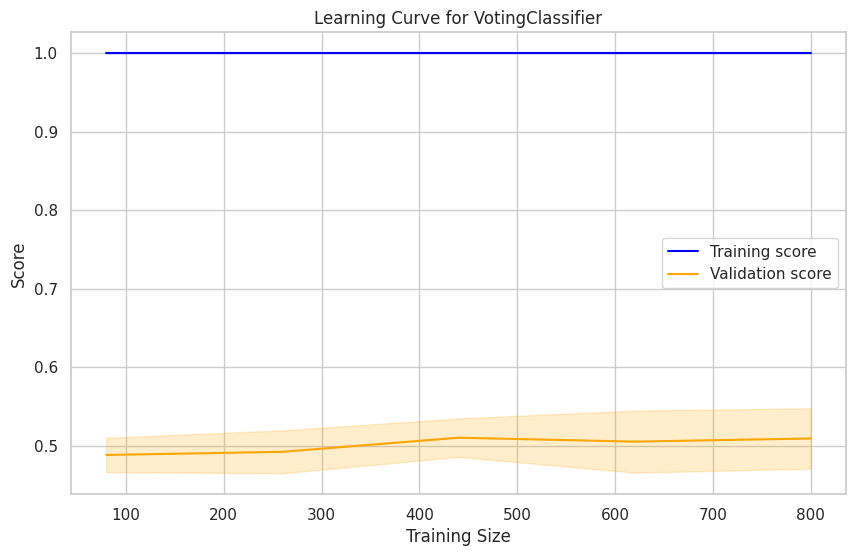

In [35]:
from sklearn.model_selection import learning_curve
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Example dataset creation (replace with your actual data)
# Ensure your X_selected and y are aligned and from the same source
# Replace this with your actual dataset loading and preprocessing
np.random.seed(42)  # For reproducibility
X = np.random.rand(1000, 10)  # Example feature matrix
y = np.random.randint(0, 2, 1000)  # Example binary target variable

# Split into selected features (X_selected) and target (y)
X_selected = X  # Assuming you already selected features

# Initialize models
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Create the ensemble model (Voting Classifier)
ensemble_model = VotingClassifier(
    estimators=[('rf', rf_model), ('xgb', xgb_model)],
    voting='hard'  # Hard voting (majority class)
)

# Fit the ensemble model
ensemble_model.fit(X_selected, y)

# Function to plot the learning curve
def plot_learning_curve(model, X, y, cv=5):
    """
    Plots the learning curve for a given model.
    :param model: The machine learning model.
    :param X: Feature matrix.
    :param y: Target vector.
    :param cv: Number of cross-validation folds.
    """
    train_sizes, train_scores, validation_scores = learning_curve(
        model, X, y, cv=cv, n_jobs=-1
    )

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores.mean(axis=1), label="Training score", color="blue")
    plt.fill_between(
        train_sizes,
        train_scores.mean(axis=1) - train_scores.std(axis=1),
        train_scores.mean(axis=1) + train_scores.std(axis=1),
        color="blue",
        alpha=0.2
    )
    plt.plot(train_sizes, validation_scores.mean(axis=1), label="Validation score", color="orange")
    plt.fill_between(
        train_sizes,
        validation_scores.mean(axis=1) - validation_scores.std(axis=1),
        validation_scores.mean(axis=1) + validation_scores.std(axis=1),
        color="orange",
        alpha=0.2
    )
    plt.xlabel("Training Size")
    plt.ylabel("Score")
    plt.title(f"Learning Curve for {model.__class__.__name__}")
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the learning curve for the ensemble model
plot_learning_curve(ensemble_model, X_selected, y)


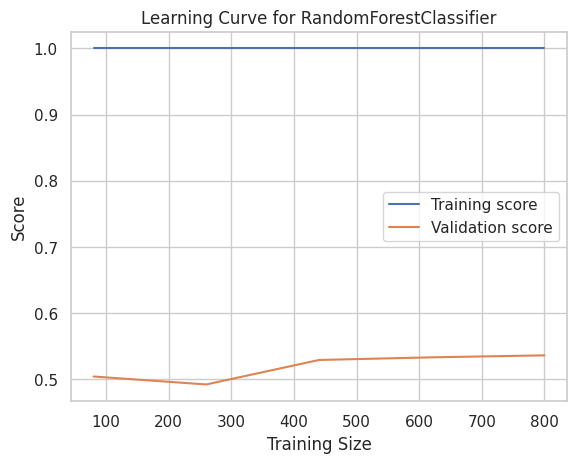

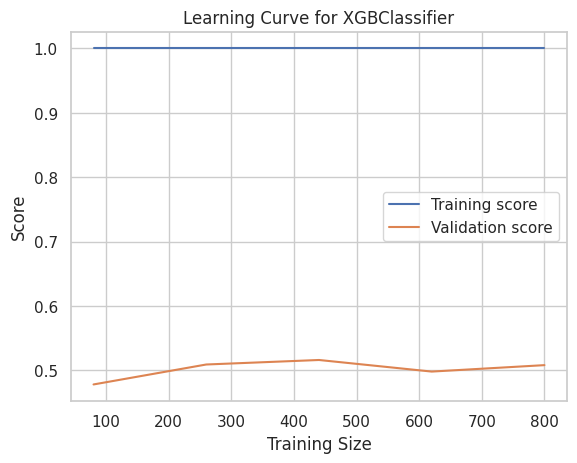

In [36]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

def plot_learning_curve(model, X, y):
    train_sizes, train_scores, validation_scores = learning_curve(model, X, y, cv=5, n_jobs=-1)
    plt.plot(train_sizes, train_scores.mean(axis=1), label="Training score")
    plt.plot(train_sizes, validation_scores.mean(axis=1), label="Validation score")
    plt.xlabel("Training Size")
    plt.ylabel("Score")
    plt.title(f"Learning Curve for {model.__class__.__name__}")
    plt.legend()
    plt.show()

# Plot for Random Forest
plot_learning_curve(rf_model, X_selected, y)
# Plot for XGBoost
plot_learning_curve(xgb_model, X_selected, y)

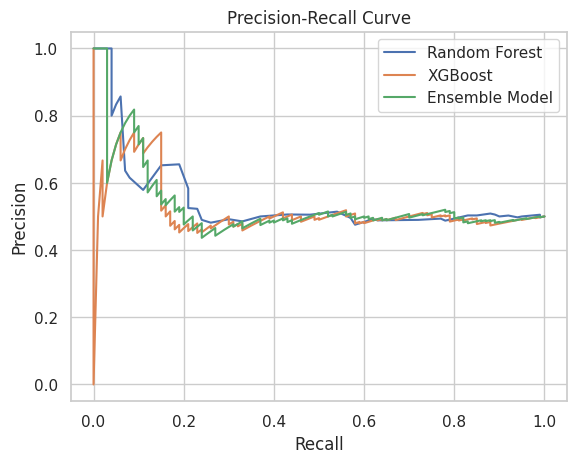

In [37]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# Example dataset (replace with your actual data)
np.random.seed(42)
X = np.random.rand(1000, 10)
y = np.random.randint(0, 2, 1000)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
ensemble_model = VotingClassifier(
    estimators=[('rf', rf_model), ('xgb', xgb_model)], voting='soft'
)

# Fit models
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
ensemble_model.fit(X_train, y_train)

# Predictions
rf_preds = rf_model.predict_proba(X_test)[:, 1]
xgb_preds = xgb_model.predict_proba(X_test)[:, 1]
final_preds = ensemble_model.predict_proba(X_test)[:, 1]

# Precision-Recall Curve
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_preds)
xgb_precision, xgb_recall, _ = precision_recall_curve(y_test, xgb_preds)
ensemble_precision, ensemble_recall, _ = precision_recall_curve(y_test, final_preds)

# Plot
plt.plot(rf_recall, rf_precision, label="Random Forest")
plt.plot(xgb_recall, xgb_precision, label="XGBoost")
plt.plot(ensemble_recall, ensemble_precision, label="Ensemble Model")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.title("Precision-Recall Curve")
plt.show()


In [38]:
import pandas as pd

model_comparison = {
    'Model': ['Random Forest', 'XGBoost', 'Ensemble'],
    'Accuracy': [rf_accuracy, xgb_accuracy, accuracy_score],
    'AUC': [rf_auc, xgb_auc, ensemble_auc],
    'Precision': [rf_precision, xgb_precision, ensemble_precision],
    'Recall': [rf_recall, xgb_recall, ensemble_recall],
    'F1 Score': [rf_f1_score, xgb_f1_score, f1_score]
}

df_comparison = pd.DataFrame(model_comparison)
print(df_comparison)

           Model                                     Accuracy       AUC  \
0  Random Forest                                       0.9953  0.937946   
1        XGBoost                                        0.895  0.943523   
2       Ensemble  <function accuracy_score at 0x7a66812865f0>  0.999622   

                                           Precision  \
0  [0.5, 0.49748743718592964, 0.5, 0.502538071065...   
1  [0.5, 0.49748743718592964, 0.494949494949495, ...   
2  [0.5, 0.49748743718592964, 0.5, 0.497461928934...   

                                              Recall  \
0  [1.0, 0.99, 0.99, 0.99, 0.99, 0.95, 0.94, 0.92...   
1  [1.0, 0.99, 0.98, 0.98, 0.97, 0.96, 0.95, 0.95...   
2  [1.0, 0.99, 0.99, 0.98, 0.97, 0.96, 0.96, 0.95...   

                                F1 Score  
0                               0.993958  
1                               0.896552  
2  <function f1_score at 0x7a66812869e0>  


In [39]:
data_cleaned.shape

(4254, 11)

**Cross-Validation for Generalization**

In [40]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
import numpy as np

# Step 1: Split data for hold-out test set
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 2: Define Models
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)

# Step 3: Cross-Validation for Generalization Evaluation
# Define Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Evaluate Random Forest
print("\n=== Random Forest Cross-Validation ===")
rf_scores = {metric: cross_val_score(rf_model, X_train, y_train, cv=skf, scoring=scoring[metric]) for metric in scoring}
for metric, scores in rf_scores.items():
    print(f"{metric.capitalize()} (CV Mean): {np.mean(scores):.4f} | Std: {np.std(scores):.4f}")

# Evaluate XGBoost
print("\n=== XGBoost Cross-Validation ===")
xgb_scores = {metric: cross_val_score(xgb_model, X_train, y_train, cv=skf, scoring=scoring[metric]) for metric in scoring}
for metric, scores in xgb_scores.items():
    print(f"{metric.capitalize()} (CV Mean): {np.mean(scores):.4f} | Std: {np.std(scores):.4f}")

# Step 4: Train Models on Full Training Data
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Step 5: Evaluate on Hold-Out Test Set
rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

# Ensemble Majority Voting
final_preds = np.where((rf_preds + xgb_preds) >= 1, 1, 0)

# Calculate Metrics
print("\n=== Hold-Out Test Set Evaluation (Ensemble) ===")
print(f"Accuracy: {accuracy_score(y_test, final_preds):.4f}")
print(f"Precision: {precision_score(y_test, final_preds):.4f}")
print(f"Recall: {recall_score(y_test, final_preds):.4f}")
print(f"F1 Score: {f1_score(y_test, final_preds):.4f}")



=== Random Forest Cross-Validation ===
Accuracy (CV Mean): 0.5575 | Std: 0.0199
Precision (CV Mean): 0.5696 | Std: 0.0185
Recall (CV Mean): 0.6024 | Std: 0.0424
F1 (CV Mean): 0.5849 | Std: 0.0247

=== XGBoost Cross-Validation ===
Accuracy (CV Mean): 0.5162 | Std: 0.0410
Precision (CV Mean): 0.5319 | Std: 0.0385
Recall (CV Mean): 0.5422 | Std: 0.0610
F1 (CV Mean): 0.5366 | Std: 0.0487

=== Hold-Out Test Set Evaluation (Ensemble) ===
Accuracy: 0.5100
Precision: 0.5076
Recall: 0.6700
F1 Score: 0.5776


#Other Models

In [41]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.0 MB/s eta 0:00:00


# Alternative methodology

**DATA AUGMENTATION USING SMOTE**

In [46]:
from imblearn.over_sampling import SMOTE

# Separate features (X) and target variable (y)
X = data.drop(['loan_id', 'loan_status'], axis=1)  # Exclude target and non-predictive columns
y = data['loan_status']

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to generate synthetic data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine resampled data back into a DataFrame
augmented_data_smote = pd.DataFrame(X_resampled, columns=X.columns)
augmented_data_smote['loan_status'] = y_resampled

# Check the new dataset size
print(f"New dataset size after SMOTE: {augmented_data_smote.shape[0]}")


New dataset size after SMOTE: 5312


**RANDOM SAMPLING (Over-sampling)**

In [47]:
# Function to create larger dataset by random sampling
def increase_dataset_size(df, target_size=12000):
    # Calculate how many times to duplicate the data
    num_duplicates = (target_size // df.shape[0]) + 1
    augmented_df = pd.concat([df] * num_duplicates, ignore_index=True)
    return augmented_df.iloc[:target_size, :]

# Increase dataset size to ~12,000
augmented_data_random = increase_dataset_size(data, target_size=12000)

# Check the size of the augmented dataset
print(f"New dataset size: {augmented_data_random.shape[0]}")


New dataset size: 12000


**DATASET SIZE AFTER AUGMENTATION**

In [48]:
augmented_data_random.shape

(12000, 11)

In [49]:
pip install pytorch-tabnet scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.8 MB/s eta 0:00:00


**HYBRID MODEL (TABNET+RF)**

In [50]:
# Import libraries
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, train_test_split
import numpy as np
import joblib  # For saving and loading models


# Update X and y with the augmented data
X = augmented_data_random.drop(['loan_id', 'loan_status'], axis=1)  # Drop non-predictive columns
y = augmented_data_random['loan_status']  # Target variable

# Step 2: Create the train-test split (80% train, 20% test)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: TabNet Configuration
tabnet = TabNetClassifier(
    seed=42,
    verbose=1,
    lambda_sparse=1e-4,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2)
)

# Create Stratified K-Fold cross-validation (5 folds)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# TabNet Training and Evaluation
best_epoch = 0
best_test_accuracy = 0
best_rf_model = None

# Training Loop for Stratified K-Fold
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_full, y_train_full)):
    print(f"\n=== Fold {fold + 1} ===")

    # Split data into training and validation sets for this fold
    X_resampled, X_val = X_train_full.iloc[train_idx], X_train_full.iloc[val_idx]
    y_resampled, y_val = y_train_full.iloc[train_idx], y_train_full.iloc[val_idx]

    # Train TabNet
    tabnet.fit(
        X_resampled.values, y_resampled.values,  # Convert to NumPy arrays
        eval_set=[(X_resampled.values, y_resampled.values), (X_val.values, y_val.values)],  # Convert to NumPy arrays
        eval_name=['train', 'val'],
        eval_metric=['accuracy'],
        max_epochs=100,
        patience=10,
        batch_size=256
    )

    # Extract TabNet feature embeddings
    train_embeddings = tabnet.predict_proba(X_resampled.values)
    val_embeddings = tabnet.predict_proba(X_val.values)
    test_embeddings = tabnet.predict_proba(X_test.values)  # Ensure X_test is defined

    # Train Random Forest on TabNet embeddings
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(train_embeddings, y_resampled)

    # Evaluate on validation set (within this fold)
    y_val_pred = rf.predict(val_embeddings)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print(f"Validation Accuracy (Fold {fold + 1}): {val_accuracy}")

    # Evaluate on holdout test set (X_test)
    y_test_pred = rf.predict(test_embeddings)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Test Accuracy (Fold {fold + 1}): {test_accuracy}")

    # Save the best model and its test accuracy
    if test_accuracy > best_test_accuracy:
        best_test_accuracy = test_accuracy
        best_epoch = fold + 1
        best_rf_model = rf
        joblib.dump(rf, "best_rf_model.pkl")  # Save the RF model
        tabnet.save_model("best_tabnet_model")  # Save the TabNet model

# Summary of the best model
print(f"\nBest Test Accuracy: {best_test_accuracy} at Fold {best_epoch}")

# Step 4: Validate Saved Model Reproduction
print("\n=== Validation of Saved Model ===")
# Load saved models
loaded_tabnet = TabNetClassifier()
loaded_tabnet.load_model("best_tabnet_model.zip")
loaded_rf = joblib.load("best_rf_model.pkl")

# Generate embeddings using the saved TabNet model
saved_test_embeddings = loaded_tabnet.predict_proba(X_test.values)

# Evaluate Random Forest on saved embeddings
saved_test_pred = loaded_rf.predict(saved_test_embeddings)
saved_test_accuracy = accuracy_score(y_test, saved_test_pred)
print(f"Reproduced Test Accuracy: {saved_test_accuracy}")

# Ensure reproducibility
assert np.isclose(best_test_accuracy, saved_test_accuracy), "Mismatch in reproduced accuracy!"
print("Reproduced accuracy matches the best recorded accuracy.")



=== Fold 1 ===
epoch 0  | loss: 0.44128 | train_accuracy: 0.60612 | val_accuracy: 0.60417 |  0:00:02s
epoch 1  | loss: 0.16891 | train_accuracy: 0.56536 | val_accuracy: 0.5599  |  0:00:04s
epoch 2  | loss: 0.1425  | train_accuracy: 0.5375  | val_accuracy: 0.53229 |  0:00:10s
epoch 3  | loss: 0.11848 | train_accuracy: 0.73997 | val_accuracy: 0.74062 |  0:00:13s
epoch 4  | loss: 0.10306 | train_accuracy: 0.79284 | val_accuracy: 0.79583 |  0:00:16s
epoch 5  | loss: 0.09671 | train_accuracy: 0.82786 | val_accuracy: 0.83177 |  0:00:18s
epoch 6  | loss: 0.08679 | train_accuracy: 0.86263 | val_accuracy: 0.86562 |  0:00:21s
epoch 7  | loss: 0.08308 | train_accuracy: 0.90039 | val_accuracy: 0.90469 |  0:00:26s
epoch 8  | loss: 0.08599 | train_accuracy: 0.92539 | val_accuracy: 0.9224  |  0:00:28s
epoch 9  | loss: 0.09746 | train_accuracy: 0.93529 | val_accuracy: 0.94167 |  0:00:30s
epoch 10 | loss: 0.087   | train_accuracy: 0.94271 | val_accuracy: 0.94115 |  0:00:31s
epoch 11 | loss: 0.07808 | 

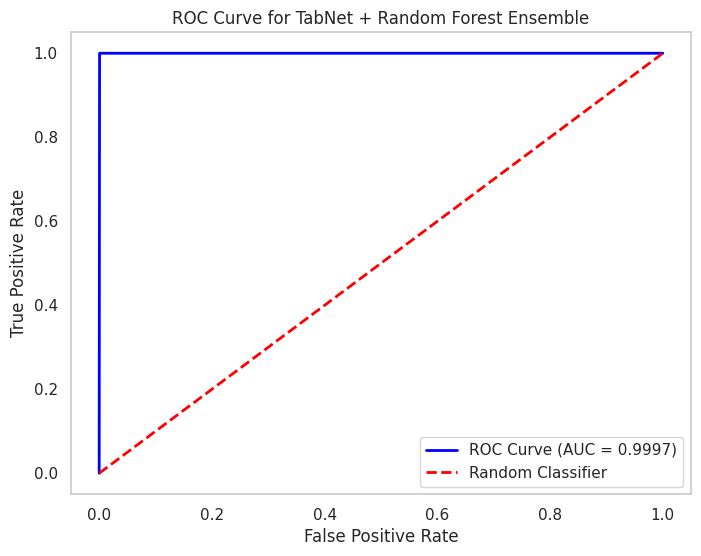

AUC for TabNet + Random Forest Ensemble: 0.9997


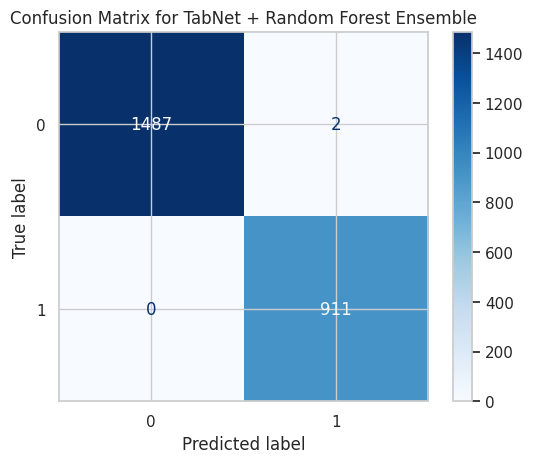

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import joblib  # For loading and saving models
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve

# Function to plot ROC curve and calculate AUC
def plot_roc_auc(y_test, y_probs, model_name="Model"):
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {roc_auc:.4f})")
    plt.plot([0, 1], [0, 1], color="red", linestyle="--", lw=2, label="Random Classifier")
    plt.title(f"ROC Curve for {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

    print(f"AUC for {model_name}: {roc_auc:.4f}")

# Function to plot Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, model_name="Model"):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_true))
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

# Step 1: Prepare the augmented dataset (12,000 instances)
# Assuming the augmented dataset is stored in `augmented_data_random`
# Update X and y with the augmented data
X = augmented_data_random.drop(['loan_id', 'loan_status'], axis=1)  # Drop non-predictive columns
y = augmented_data_random['loan_status']  # Target variable

# Step 2: Create the train-test split (80% train, 20% test)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Load the saved Random Forest model
loaded_rf = joblib.load("best_rf_model.pkl")

# Step 4: Generate embeddings using TabNet for the test data
saved_test_embeddings = loaded_tabnet.predict_proba(X_test.values)

# Step 5: Plot ROC Curve and AUC for TabNet + Random Forest Ensemble
saved_test_probs = loaded_rf.predict_proba(saved_test_embeddings)[:, 1]  # Probability for positive class
plot_roc_auc(y_test, saved_test_probs, model_name="TabNet + Random Forest Ensemble")

# Step 6: Plot Confusion Matrix
saved_test_pred = loaded_rf.predict(saved_test_embeddings)
plot_confusion_matrix(y_test, saved_test_pred, model_name="TabNet + Random Forest Ensemble")



=== Fold 1 ===
epoch 0  | loss: 0.44128 | train_accuracy: 0.60612 | val_accuracy: 0.60417 |  0:00:01s
epoch 1  | loss: 0.16891 | train_accuracy: 0.56536 | val_accuracy: 0.5599  |  0:00:05s
epoch 2  | loss: 0.1425  | train_accuracy: 0.5375  | val_accuracy: 0.53229 |  0:00:08s
epoch 3  | loss: 0.11848 | train_accuracy: 0.73997 | val_accuracy: 0.74062 |  0:00:11s
epoch 4  | loss: 0.10306 | train_accuracy: 0.79284 | val_accuracy: 0.79583 |  0:00:14s
epoch 5  | loss: 0.09671 | train_accuracy: 0.82786 | val_accuracy: 0.83177 |  0:00:16s
epoch 6  | loss: 0.08679 | train_accuracy: 0.86263 | val_accuracy: 0.86562 |  0:00:21s
epoch 7  | loss: 0.08308 | train_accuracy: 0.90039 | val_accuracy: 0.90469 |  0:00:23s
epoch 8  | loss: 0.08599 | train_accuracy: 0.92539 | val_accuracy: 0.9224  |  0:00:25s
epoch 9  | loss: 0.09746 | train_accuracy: 0.93529 | val_accuracy: 0.94167 |  0:00:28s
epoch 10 | loss: 0.087   | train_accuracy: 0.94271 | val_accuracy: 0.94115 |  0:00:31s
epoch 11 | loss: 0.07808 | 

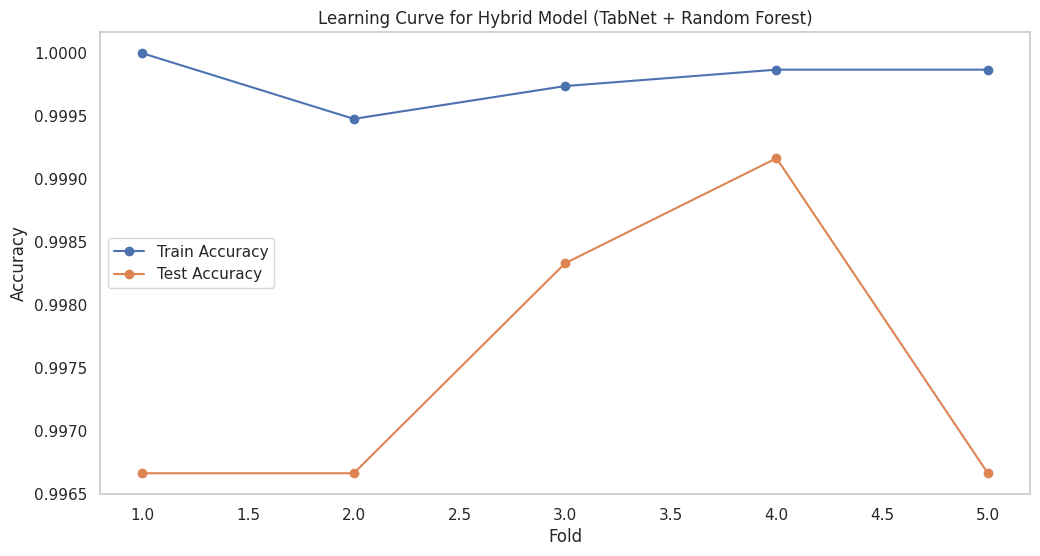

In [52]:
import matplotlib.pyplot as plt

# Initialize lists to store fold-wise accuracies
train_accuracies = []
val_accuracies = []
test_accuracies = []

# Stratified K-Fold Cross-Validation for Hybrid Model
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_full, y_train_full)):
    print(f"\n=== Fold {fold + 1} ===")

    # Split data into training and validation sets for this fold
    X_resampled, X_val = X_train_full.iloc[train_idx], X_train_full.iloc[val_idx]
    y_resampled, y_val = y_train_full.iloc[train_idx], y_train_full.iloc[val_idx]

    # Train TabNet
    tabnet.fit(
        X_resampled.values, y_resampled.values,  # Convert to NumPy arrays
        eval_set=[(X_resampled.values, y_resampled.values), (X_val.values, y_val.values)],  # Convert to NumPy arrays
        eval_name=['train', 'val'],
        eval_metric=['accuracy'],
        max_epochs=100,
        patience=10,
        batch_size=256
    )

    # Extract TabNet embeddings
    train_embeddings = tabnet.predict_proba(X_resampled.values)
    val_embeddings = tabnet.predict_proba(X_val.values)
    test_embeddings = tabnet.predict_proba(X_test.values)

    # Train Random Forest on TabNet embeddings
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(train_embeddings, y_resampled)

    # Evaluate Random Forest
    y_train_pred = rf.predict(train_embeddings)
    train_accuracy = accuracy_score(y_resampled, y_train_pred)

    y_val_pred = rf.predict(val_embeddings)
    val_accuracy = accuracy_score(y_val, y_val_pred)

    y_test_pred = rf.predict(test_embeddings)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Append fold-wise accuracy to lists
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    test_accuracies.append(test_accuracy)

    print(f"Fold {fold + 1} - Train Accuracy: {train_accuracy}, Val Accuracy: {val_accuracy}, Test Accuracy: {test_accuracy}")

# Plot Learning Curves
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label="Train Accuracy", marker='o')
plt.plot(range(1, len(test_accuracies) + 1), test_accuracies, label="Test Accuracy", marker='o')

plt.title("Learning Curve for Hybrid Model (TabNet + Random Forest)")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()


**VISUALIZATION GRAPHS FOR TRAINING LOSS, VALIDATION & TEST ACCURACIES**

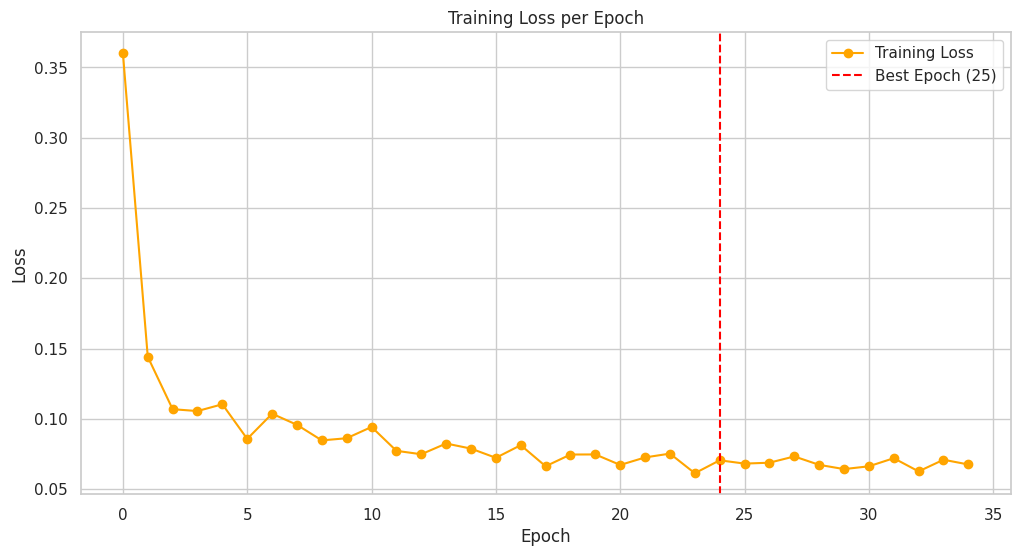

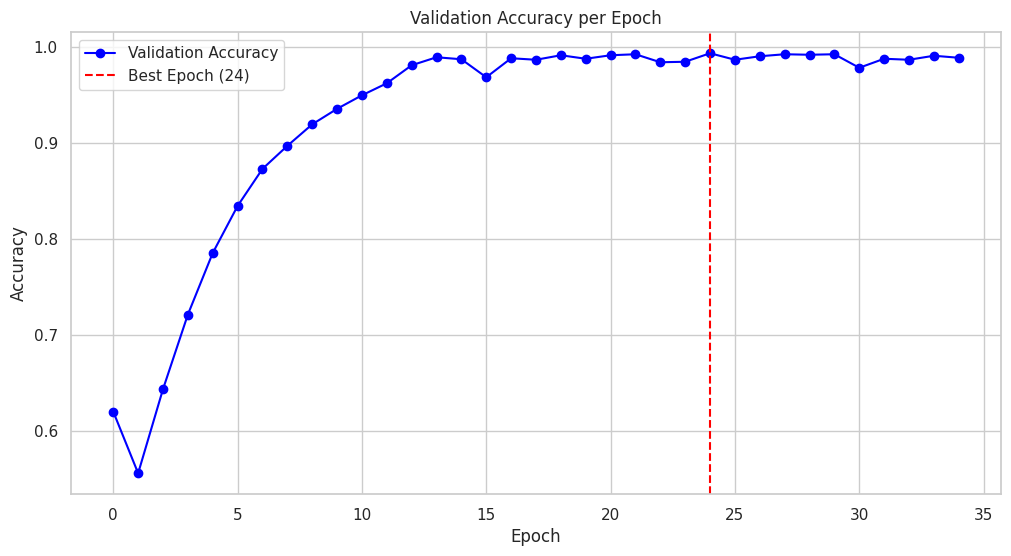

Best Validation Accuracy: 0.9932 at Epoch 25
Test Accuracy: 0.9883


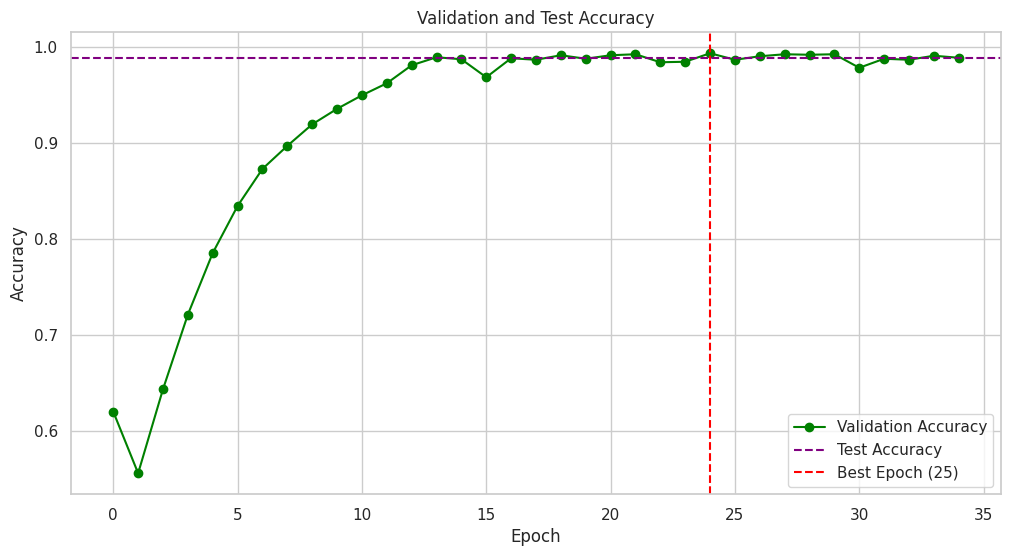

In [53]:
import matplotlib.pyplot as plt
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Ensure `X_test` is a NumPy array (TabNet does not accept Pandas DataFrame)
X_test_np = X_test.values  # Convert from DataFrame to NumPy array

# Ensure `history` exists
try:
    history = tabnet.history  # Retrieve training history
    epochs = len(history['loss'])  # Total number of epochs
except AttributeError:
    raise ValueError("`tabnet.history` is not available. Ensure training metrics were logged.")

# Extract training loss and validation accuracy
train_losses = history['loss']
val_accuracies = history['val_accuracy']

# Identify the best epoch based on validation accuracy
best_epoch = np.argmax(val_accuracies)
best_val_accuracy = val_accuracies[best_epoch]

# Plot Training Loss
plt.figure(figsize=(12, 6))
plt.plot(range(epochs), train_losses, label="Training Loss", marker='o', color='orange')
plt.axvline(best_epoch, color='red', linestyle='--', label=f"Best Epoch ({best_epoch + 1})")
plt.title("Training Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# Plot Validation Accuracy
plt.figure(figsize=(12, 6))
plt.plot(range(epochs), val_accuracies, label="Validation Accuracy", marker='o', color='blue')
plt.axvline(best_epoch, color='red', linestyle='--', label=f"Best Epoch ({best_epoch})")
plt.title("Validation Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Test the model on the test set
test_preds = tabnet.predict(X_test_np)  # Use NumPy array
test_accuracy = accuracy_score(y_test, test_preds)

# Print Best Validation Accuracy and Test Accuracy
print(f"Best Validation Accuracy: {best_val_accuracy:.4f} at Epoch {best_epoch + 1}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot Validation and Test Accuracy
plt.figure(figsize=(12, 6))
plt.plot(range(epochs), val_accuracies, label="Validation Accuracy", marker='o', color='green')
plt.axhline(test_accuracy, color='purple', linestyle='--', label="Test Accuracy")
plt.axvline(best_epoch, color='red', linestyle='--', label=f"Best Epoch ({best_epoch + 1})")
plt.title("Validation and Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


**FEATURE LEVEL IMPORTANCE**

TabNet Feature Importances:
no_of_dependents: 0.0540
education: 0.1504
self_employed: 0.0408
income_annum: 0.0593
loan_amount: 0.0549
loan_term: 0.0643
cibil_score: 0.5268
income_to_loan_ratio: 0.0361
total_asset_value: 0.0134


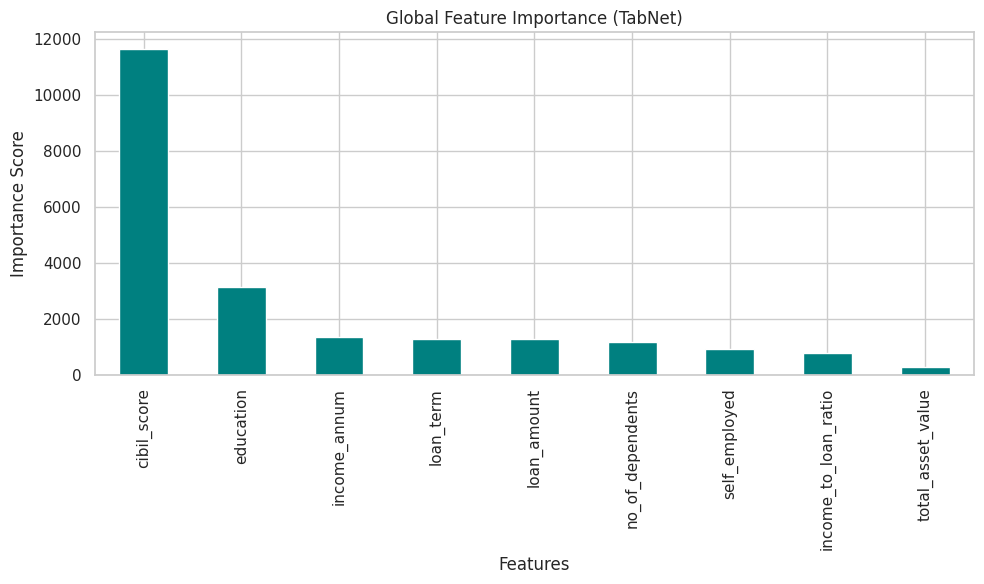

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate explanations for the test dataset using TabNet
explanations = tabnet.explain(X_test.values)

# Print feature importances from TabNet
print("TabNet Feature Importances:")
feature_importance_tabnet = tabnet.feature_importances_
for name, importance in zip(X.columns, feature_importance_tabnet):
    print(f"{name}: {importance:.4f}")

# Step 1: Extract the feature importance array from the explanations tuple
# Shape: (number of samples in X_test, number of features)
feature_importance_array = explanations[0]

# Step 2: Aggregate feature importances across all samples
# Summing across rows to get global feature importance
global_feature_importance = np.sum(feature_importance_array, axis=0)

# Step 3: Map aggregated feature importances to feature names
feature_names = X.columns  # Ensure this matches the original feature names
feature_importance_series = pd.Series(global_feature_importance, index=feature_names)

# Step 4: Sort feature importances for visualization
feature_importance_sorted = feature_importance_series.sort_values(ascending=False)

# Step 5: Plot global feature importance
plt.figure(figsize=(10, 6))
feature_importance_sorted.plot(kind='bar', color='teal', title="Global Feature Importance (TabNet)")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


**INSTANCE LEVEL EXPLAINATION**

In [55]:
sample_index = 0  # Index of the instance you want to explain
instance_importance = np.sum(explanations[sample_index], axis=0)  # Aggregate across steps

# Map feature importance to feature names
instance_importance = pd.Series(instance_importance, index=feature_names)
instance_importance = instance_importance.sort_values(ascending=False)
print(instance_importance)

cibil_score             11670.527091
education                3143.692951
income_annum             1347.380971
loan_term                1285.323984
loan_amount              1275.970640
no_of_dependents         1178.761059
self_employed             925.556994
income_to_loan_ratio      784.034696
total_asset_value         294.852037
dtype: float64


**TABNET MODEL (STANDALONE)**

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import joblib  # For saving and loading the model

# Step 1: Preprocessing and Dataset Preparation
# Assuming `data_combined` is your augmented dataset
X = augmented_data_random.drop(['loan_id', 'loan_status'], axis=1)  # Features
y = augmented_data_random['loan_status']  # Target

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Define TabNet Classifier
tabnet = TabNetClassifier(
    seed=42,
    verbose=1,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    lambda_sparse=1e-4
)

# Step 3: Train TabNet
tabnet.fit(
    X_train.values, y_train.values,  # Convert to NumPy arrays
    eval_set=[(X_train.values, y_train.values), (X_test.values, y_test.values)],
    eval_name=['train', 'test'],
    eval_metric=['accuracy'],
    max_epochs=100,
    patience=10,
    batch_size=256,
    virtual_batch_size=128
)

# Save the best model based on validation accuracy
tabnet.save_model("best_tabnet_model")

# Step 4: Evaluate TabNet
# Predict on test data
y_pred = tabnet.predict(X_test.values)

# Calculate evaluation metrics
test_accuracy = accuracy_score(y_test, y_pred)
print("\n=== Evaluation Metrics ===")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



epoch 0  | loss: 0.37545 | train_accuracy: 0.62021 | test_accuracy: 0.62042 |  0:00:01s
epoch 1  | loss: 0.14042 | train_accuracy: 0.6199  | test_accuracy: 0.62042 |  0:00:02s
epoch 2  | loss: 0.1078  | train_accuracy: 0.69865 | test_accuracy: 0.70083 |  0:00:04s
epoch 3  | loss: 0.10335 | train_accuracy: 0.77896 | test_accuracy: 0.78208 |  0:00:05s
epoch 4  | loss: 0.09784 | train_accuracy: 0.86    | test_accuracy: 0.8625  |  0:00:07s
epoch 5  | loss: 0.09875 | train_accuracy: 0.86677 | test_accuracy: 0.87333 |  0:00:09s
epoch 6  | loss: 0.07692 | train_accuracy: 0.91594 | test_accuracy: 0.91542 |  0:00:11s
epoch 7  | loss: 0.08373 | train_accuracy: 0.92667 | test_accuracy: 0.92833 |  0:00:12s
epoch 8  | loss: 0.08312 | train_accuracy: 0.95479 | test_accuracy: 0.95458 |  0:00:14s
epoch 9  | loss: 0.07567 | train_accuracy: 0.94948 | test_accuracy: 0.95208 |  0:00:16s
epoch 10 | loss: 0.08005 | train_accuracy: 0.9674  | test_accuracy: 0.96417 |  0:00:17s
epoch 11 | loss: 0.08767 | train

In [57]:
# Final Summary
print(f"\nBest Validation Accuracy: {val_accuracies[best_epoch]:.4f} at Epoch {best_epoch + 1}")

# Step : Verify Saved Model
# Load saved model
loaded_tabnet = TabNetClassifier()
loaded_tabnet.load_model("best_tabnet_model.zip")

# Reproduce test results
reproduced_preds = loaded_tabnet.predict(X_test.values)
reproduced_accuracy = accuracy_score(y_test, reproduced_preds)

# Verify results match
print("\n=== Reproduced Results ===")
print(f"Reproduced Test Accuracy: {reproduced_accuracy:.4f}")
assert np.isclose(test_accuracy, reproduced_accuracy), "Mismatch in reproduced accuracy!"
print("Reproduced accuracy matches the originally recorded test accuracy.")


Best Validation Accuracy: 0.9932 at Epoch 25

=== Reproduced Results ===
Reproduced Test Accuracy: 0.9933
Reproduced accuracy matches the originally recorded test accuracy.


# MODEL INBUILT INTERPRETABILITY


=== TabNet Feature Importances ===
no_of_dependents: 0.0514
education: 0.1276
self_employed: 0.0233
income_annum: 0.0180
loan_amount: 0.0524
loan_term: 0.0490
cibil_score: 0.5578
income_to_loan_ratio: 0.0469
total_asset_value: 0.0735


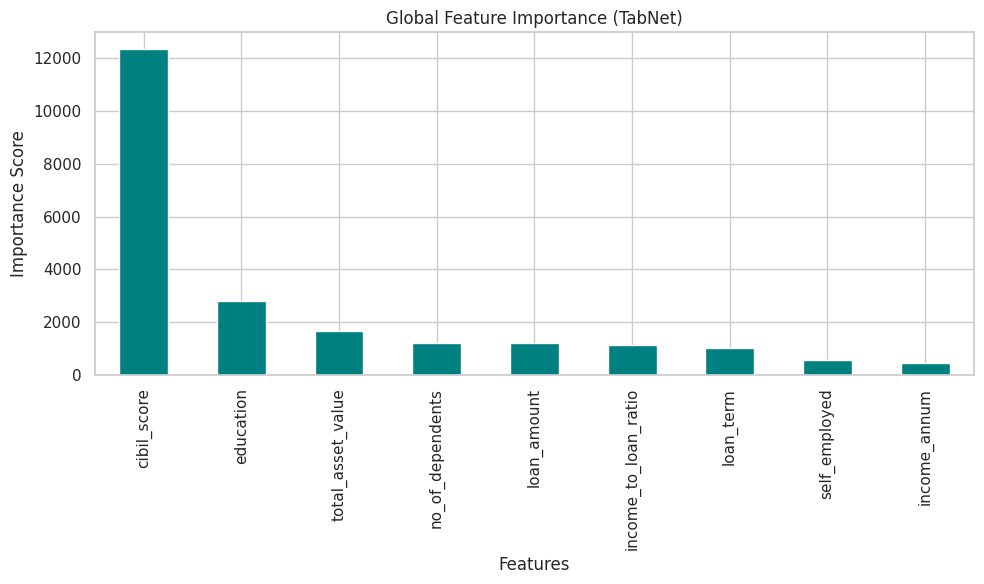

In [58]:
# Step 5: Feature Importance Analysis
# Generate explanations for the test dataset
explanations = tabnet.explain(X_test.values)

# Print global feature importance
print("\n=== TabNet Feature Importances ===")
feature_importance_tabnet = tabnet.feature_importances_
for name, importance in zip(X.columns, feature_importance_tabnet):
    print(f"{name}: {importance:.4f}")

# Step 6: Visualize Global Feature Importance
# Aggregate feature importances from explanations
global_feature_importance = np.sum(explanations[0], axis=0)  # Sum across all test samples
feature_importance_series = pd.Series(global_feature_importance, index=X.columns)

# Sort and plot
feature_importance_sorted = feature_importance_series.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importance_sorted.plot(kind='bar', color='teal', title="Global Feature Importance (TabNet)")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()



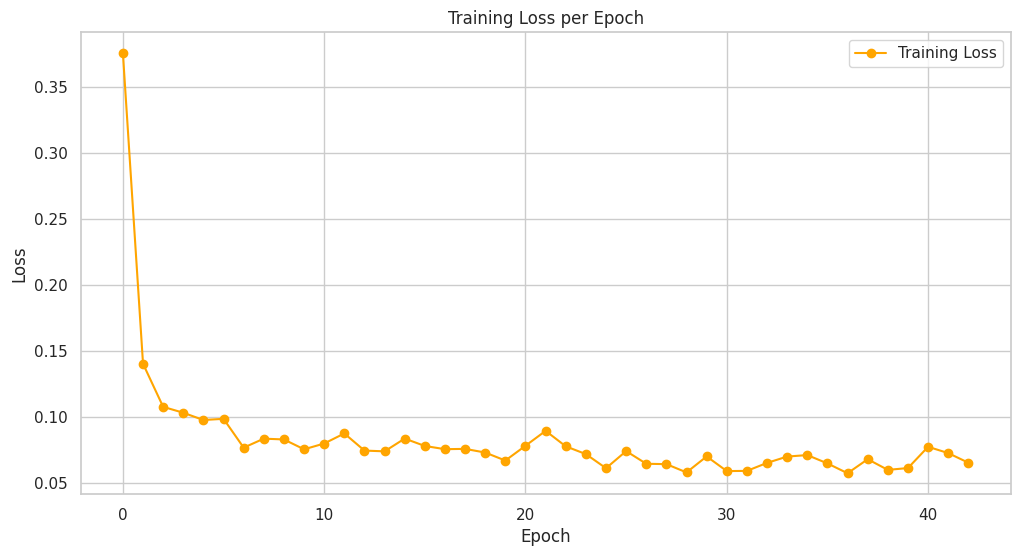

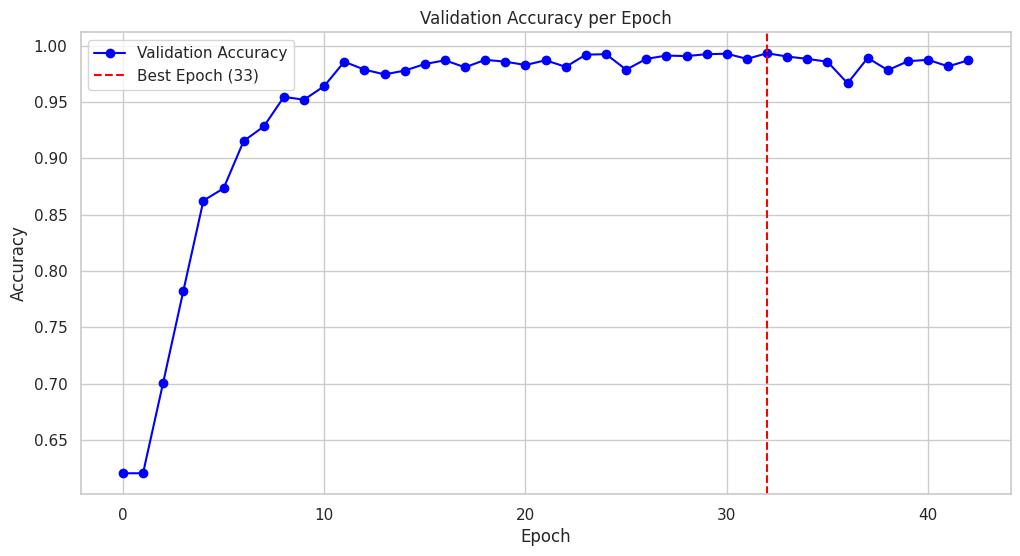

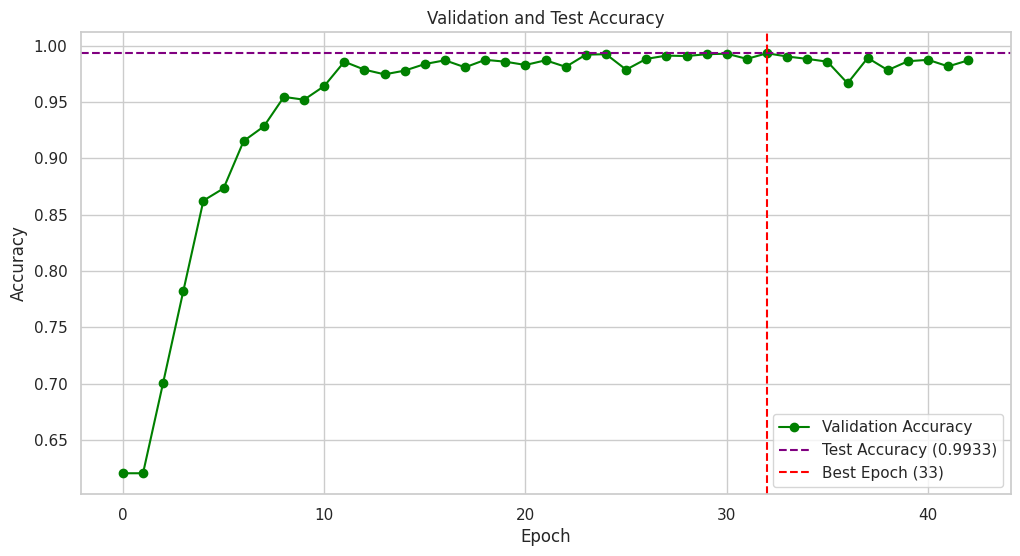

In [59]:

# Step 6: Visualize Training and Validation Metrics
history = tabnet.history
epochs = len(history['loss'])
val_accuracies = history['test_accuracy']
best_epoch = np.argmax(val_accuracies)

# Plot Training Loss
plt.figure(figsize=(12, 6))
plt.plot(range(epochs), history['loss'], label="Training Loss", marker='o', color='orange')
plt.title("Training Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# Plot Validation Accuracy
plt.figure(figsize=(12, 6))
plt.plot(range(epochs), val_accuracies, label="Validation Accuracy", marker='o', color='blue')
plt.axvline(best_epoch, color='red', linestyle='--', label=f"Best Epoch ({best_epoch + 1})")
plt.title("Validation Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Plot Test Accuracy (alongside Validation Accuracy)
plt.figure(figsize=(12, 6))
plt.plot(range(epochs), val_accuracies, label="Validation Accuracy", marker='o', color='green')
plt.axhline(test_accuracy, color='purple', linestyle='--', label=f"Test Accuracy ({test_accuracy:.4f})")
plt.axvline(best_epoch, color='red', linestyle='--', label=f"Best Epoch ({best_epoch + 1})")
plt.title("Validation and Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


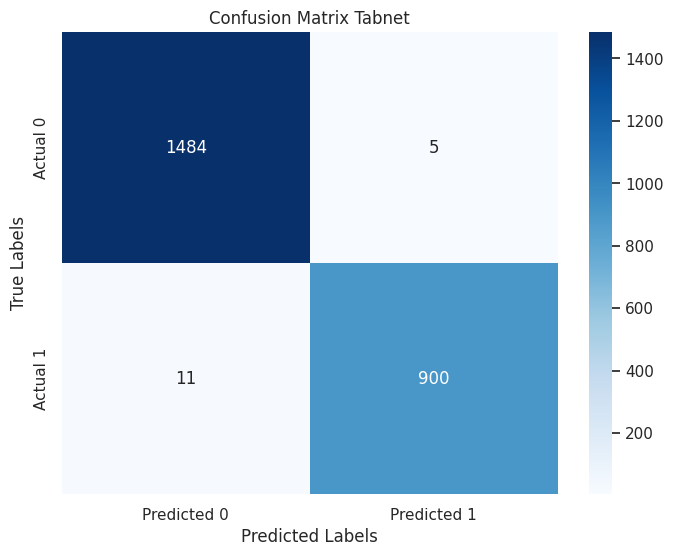

In [60]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Step 7: Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 8: Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Tabnet')
plt.show()

AUC Score: 0.9984


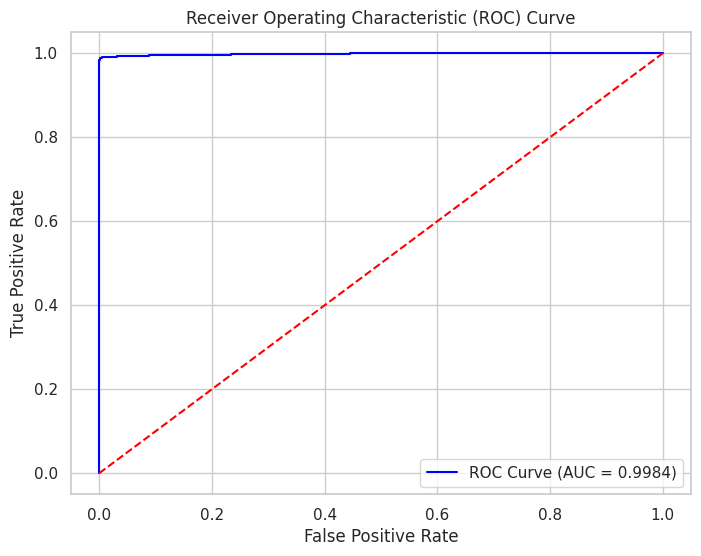

In [61]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Step 1: Get predicted probabilities for the positive class (loan status = 1)
y_prob = tabnet.predict_proba(X_test.values)[:, 1]  # Probability for the positive class

# Step 2: Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Step 3: Compute AUC
auc = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc:.4f}")

# Step 4: Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

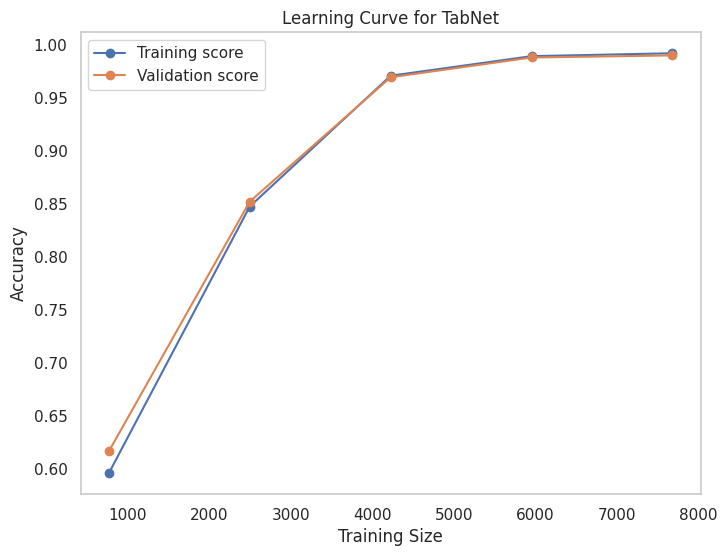

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import joblib  # For loading and saving models
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve


# Function to plot Learning Curve for TabNet
def plot_learning_curve_tabnet(tabnet, X_train, y_train):
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator=tabnet,
        X=X_train.values,
        y=y_train.values,
        train_sizes=np.linspace(0.1, 1.0, 5),
        cv=5,
        n_jobs=-1,
        scoring='accuracy'
    )
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores.mean(axis=1), label="Training score", marker="o")
    plt.plot(train_sizes, validation_scores.mean(axis=1), label="Validation score", marker="o")
    plt.title("Learning Curve for TabNet")
    plt.xlabel("Training Size")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid()
    plt.show()

# Step 7: Plot Learning Curve for TabNet
plot_learning_curve_tabnet(loaded_tabnet, X_train_full, y_train_full)

epoch 0  | loss: 0.67826 |  0:00:00s
epoch 1  | loss: 0.40667 |  0:00:00s
epoch 2  | loss: 0.24765 |  0:00:01s
epoch 3  | loss: 0.18631 |  0:00:01s
epoch 4  | loss: 0.15166 |  0:00:02s
epoch 5  | loss: 0.12973 |  0:00:02s
epoch 6  | loss: 0.11212 |  0:00:03s
epoch 7  | loss: 0.09871 |  0:00:03s
epoch 8  | loss: 0.08805 |  0:00:04s
epoch 9  | loss: 0.07898 |  0:00:04s
epoch 10 | loss: 0.06716 |  0:00:04s
epoch 11 | loss: 0.06837 |  0:00:05s
epoch 12 | loss: 0.07066 |  0:00:06s
epoch 13 | loss: 0.06277 |  0:00:06s
epoch 14 | loss: 0.07259 |  0:00:07s
epoch 15 | loss: 0.06443 |  0:00:08s
epoch 16 | loss: 0.06335 |  0:00:08s
epoch 17 | loss: 0.06367 |  0:00:09s
epoch 18 | loss: 0.05398 |  0:00:10s
epoch 19 | loss: 0.05952 |  0:00:10s
epoch 20 | loss: 0.06008 |  0:00:11s
epoch 21 | loss: 0.05238 |  0:00:11s
epoch 22 | loss: 0.0598  |  0:00:12s
epoch 23 | loss: 0.05001 |  0:00:12s
epoch 24 | loss: 0.04894 |  0:00:12s
epoch 25 | loss: 0.06344 |  0:00:13s
epoch 26 | loss: 0.07647 |  0:00:13s
e

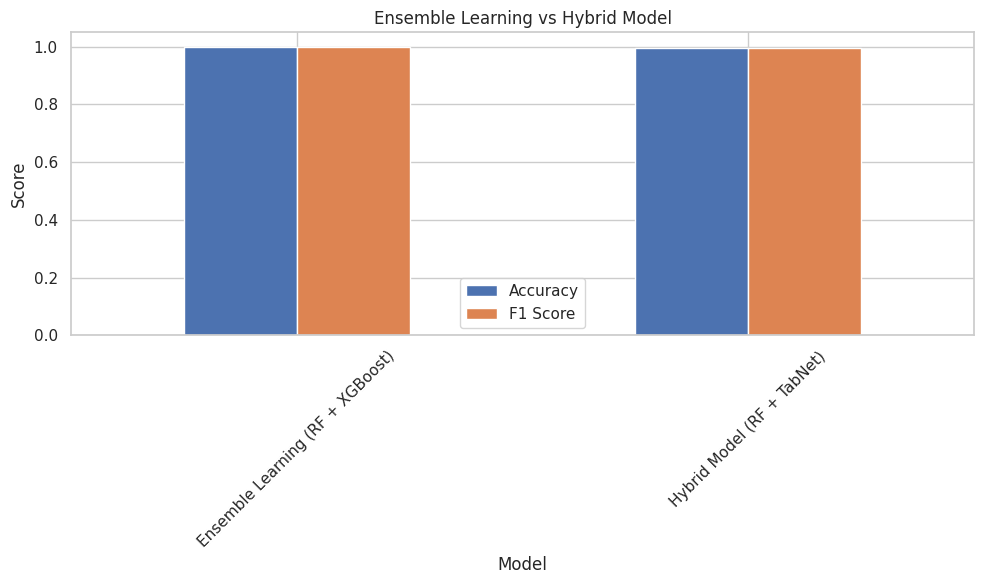

In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from pytorch_tabnet.tab_model import TabNetClassifier
import matplotlib.pyplot as plt
from scipy.stats import mode

# Function to evaluate models
def evaluate_models(models, X_train, y_train, X_test, y_test):
    # Initialize a dictionary to store the evaluation results
    results = {}

    # Check the shapes of X_train and y_train
    print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")

    for model_name, model in models.items():
        print(f"Evaluating {model_name}...")

        # Fit the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate accuracy and F1 score
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Store the results
        results[model_name] = {
            'Accuracy': accuracy,
            'F1 Score': f1
        }

    # Convert the results dictionary to a DataFrame for better readability
    results_df = pd.DataFrame(results).T
    return results_df



#X = pd.DataFrame(data.data, columns=data.feature_names)
#y = pd.Series(data.target)

# Generating sample data (use your own dataset)
X = augmented_data_random.drop(['loan_id', 'loan_status'], axis=1)  # Features
y = augmented_data_random['loan_status']  # Target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure no missing values in the datasets
if X_train.isnull().sum().any() or y_train.isnull().sum() > 0:
    print("Warning: Missing values detected in X_train or y_train.")
    X_train = X_train.fillna(0)  # Fill missing values if necessary
    y_train = y_train.fillna(0)

# Define the models
rf_model = RandomForestClassifier(n_estimators=100)
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
tabnet_model = TabNetClassifier()

# Fit Random Forest and XGBoost
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
tabnet_model.fit(X_train.values, y_train.values)  # TabNet expects numpy arrays

# Get predictions from Random Forest and XGBoost
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)
tabnet_pred = tabnet_model.predict(X_test.values)  # TabNet expects numpy arrays

# Combine predictions (majority voting)
combined_pred_ensemble = mode(np.vstack([rf_pred, xgb_pred]), axis=0)[0].flatten()
combined_pred_hybrid = mode(np.vstack([rf_pred, tabnet_pred]), axis=0)[0].flatten()

# Calculate accuracy and F1 score for both ensemble and hybrid models
ensemble_accuracy = accuracy_score(y_test, combined_pred_ensemble)
ensemble_f1 = f1_score(y_test, combined_pred_ensemble, average='weighted')

hybrid_accuracy = accuracy_score(y_test, combined_pred_hybrid)
hybrid_f1 = f1_score(y_test, combined_pred_hybrid, average='weighted')

# Prepare results
results = {
    'Ensemble Learning (RF + XGBoost)': {
        'Accuracy': ensemble_accuracy,
        'F1 Score': ensemble_f1
    },
    'Hybrid Model (RF + TabNet)': {
        'Accuracy': hybrid_accuracy,
        'F1 Score': hybrid_f1
    }
}

# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# Print the comparison results
print("Model Comparison Results:")
print(results_df)

# Plotting the comparison results
results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Ensemble Learning vs Hybrid Model')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#SHAP Post-hoc Model INTERPRETABILITY

In [66]:
pip install shap

In [67]:
print(f"X_test shape: {X_test[:100].shape}")
print(f"Number of feature names: {len(feature_names)}")


X_test shape: (100, 9)
Number of feature names: 9


The shap.Explainer might not fully support TabNet directly. Instead of shap.Explainer, We used shap.KernelExplainer as a fallback.

In [68]:
print(type(X_test))
print(X_test.columns)

<class 'pandas.core.frame.DataFrame'>
Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'income_to_loan_ratio',
       'total_asset_value'],
      dtype='object')


Explaining TabNet Classifier Decision for Target 'loan-status':


  0%|          | 0/100 [00:00<?, ?it/s]

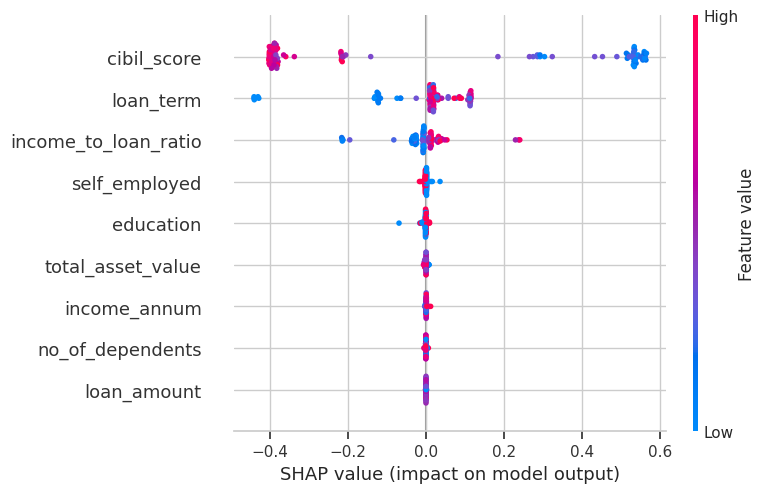


Explaining individual predictions:
Explanation for test instance 1:


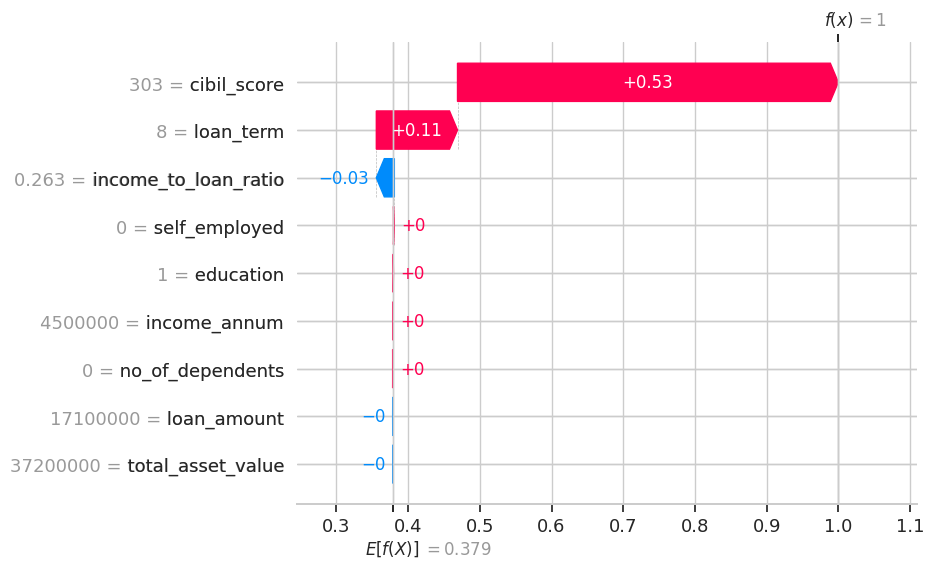

Explanation for test instance 2:


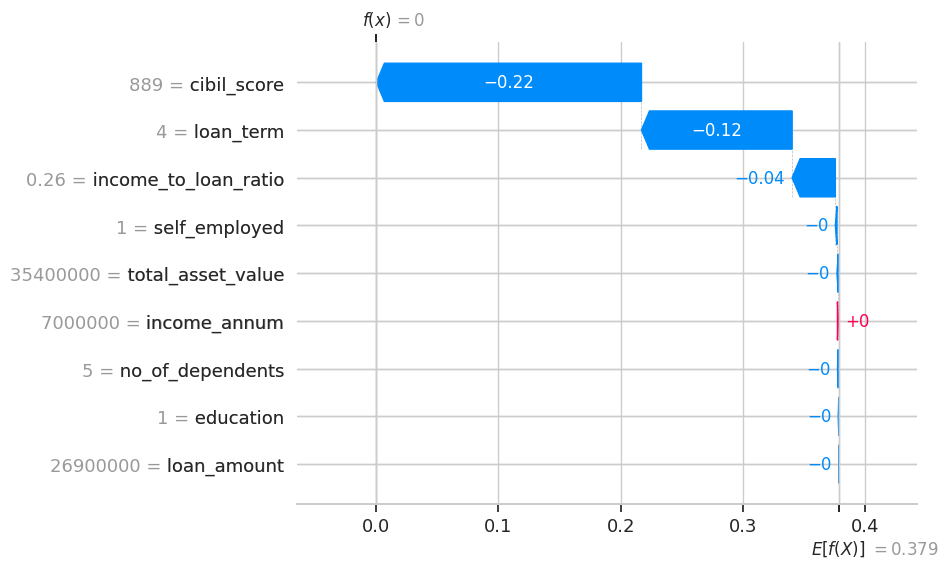

Explanation for test instance 3:


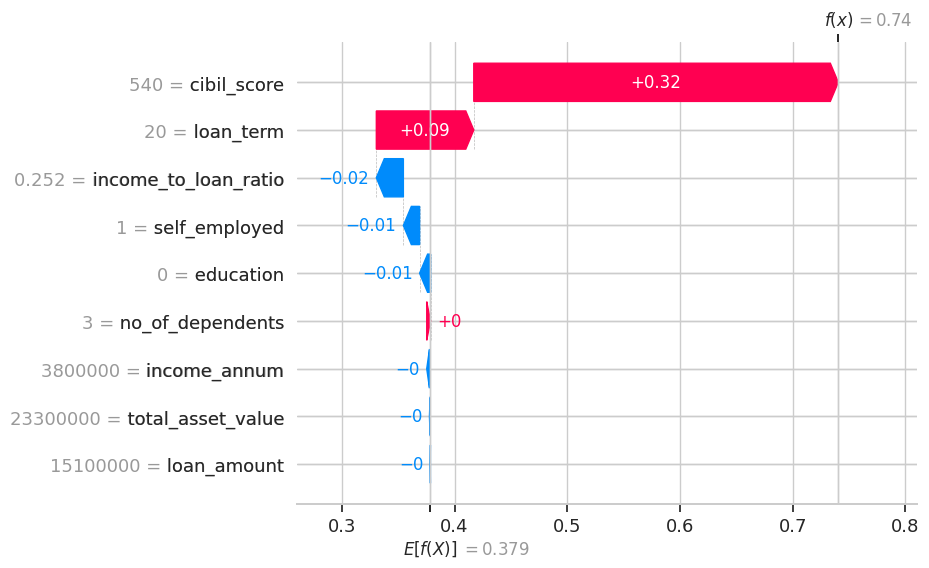

In [69]:
import shap
import numpy as np
import pandas as pd

# For TabNet Model Feature Importance
# -----------------------------------
print("Explaining TabNet Classifier Decision for Target 'loan-status':")

# Ensure X_test is compatible with SHAP (convert to NumPy array if necessary)
if isinstance(X_test, pd.DataFrame):
    X_test_array = X_test.to_numpy()  # Convert to NumPy array for consistent handling
else:
    X_test_array = X_test

# Define feature names
feature_names = ['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score','income_to_loan_ratio', 'total_asset_value']

# Validate feature names length matches X_test's columns
assert len(feature_names) == X_test_array.shape[1], "Feature names do not match the number of columns in X_test!"

# Initialize SHAP Explainer for TabNet
# tabnet_explainer = shap.Explainer(tabnet.predict_proba, X_resampled)
tabnet_explainer = shap.KernelExplainer(tabnet.predict_proba, X_resampled[:100])


# Compute SHAP values for a subset of the test data
shap_values_tabnet = tabnet_explainer(X_test_array[:100])  # Correct function call


# Class Index for 'loan-status' (assuming binary classification: 0 = denied, 1 = approved)
class_index = 1  # Targeting 'approved' class

# Summary plot for SHAP values (explains global feature importance for the target class)
shap.summary_plot(
    shap_values_tabnet[:, :, class_index],  # SHAP values for the 'approved' class
    X_test_array[:100],  # Input test data
    feature_names=feature_names  # Feature names
)

# Example-specific Explanation (explains individual predictions)
print("\nExplaining individual predictions:")
for i in range(3):  # Show explanations for the first 3 test samples
    print(f"Explanation for test instance {i+1}:")
    shap.waterfall_plot(
        shap.Explanation(
            values=shap_values_tabnet[i, :, class_index],  # SHAP values for class `class_index`
            base_values=shap_values_tabnet.base_values[i, class_index],  # Base value for class `class_index`
            data=X_test_array[i],  # Ensure row is from NumPy array
            feature_names=feature_names
        )
    )
